# Network Traffic Classification using Machine Learning Techniques

# Overview

Develop classification models using Python programming to analyze a network-related dataset. 

The primary goal is to explore the dataset, preprocess it, create and evaluate different classification models, and report your findings. 

This assignment will enhance your understanding of machine learning techniques, data preprocessing, and model evaluation while applying them to a practical problem related to network security.

# Dataset

This is a real-world dataset created by collecting network data from Universidad Del Cauca, Popayn, Colombia over six days (April 26, 27, 28 and May 9, 11 and 15) of 2017 using multiple packet capturing tools and data extracting tools. 

This dataset is consisting of 3,577,296 instances and 87 features and originally designed for application classification. Each row represents a traffic flow from a source to a destination and each column represents features of the traffic data.

This dataset is downloaded from Kaggle "IP Network Traffic Flows, Labeled with 75 Apps."

# Purpose

This test attempts to predict the application used "L7Protocol" based on the network traffic flow data.

# Type of the data in the dataset for Network Traffic

The current dataset from Kaggle is presented similar to a Session data.

According to the book "The Tao of Network Security Monitoring" by Richard Bejtlich in Chapter 7. Session Data, the chapter describes Session Data as a summary of conversation between two parties.

The basic elements of Session Data consists of:
- Source IP
- Source Port
- Destination IP
- Destination Port
- Timestamp
- Measure of the amount of information exchanged during the session

The reason why Session Data is used in the analysis is because Session Data ability to track down intruder activities in content-neutral way. 



# Origin of CICFlowMeter

https://www.unb.ca/cic/research/applications.html#CICFlowMeter

https://www.kaggle.com/datasets/jsrojas/ip-network-traffic-flows-labeled-with-87-apps 

https://www.ntop.org/products/traffic-analysis/ntop/

# Environment Setup 

In [1]:
%pip install --upgrade pip
%pip install --upgrade setuptools 
%pip install --upgrade pandas 
%pip install --upgrade scikit-learn
%pip install --upgrade kagglehub 

%pip install --upgrade matplotlib 
%pip install --upgrade seaborn 
%pip install --upgrade ipywidgets 
%pip install --upgrade joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Install PyTorch with CUDA (Optional)

This section installs the Pytorch with CUDA

In [2]:
%pip install torch torchvision torchvision --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


## Install PyTorch without Cuda

In [3]:
%pip install --upgrade torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


# Import Packages

In [4]:
import kagglehub

import numpy
import pandas
import matplotlib
import seaborn

import os
import shutil
import torch

import joblib

from sklearn.model_selection import train_test_split

# Data Retrieval

Retrieving data using kagglehub package to simplify the data retrieval process

In [5]:
def download_csv_file_from_kaggle_to_project_folder():

    while True:
        path = kagglehub.dataset_download("jsrojas/ip-network-traffic-flows-labeled-with-87-apps")

        # Verify if this dataset has been downloaded before
        if len(os.listdir(path)) == 0:
            
            #Verify if the path provided by kagglehub exists
            if os.path.isdir(path):
                #remove the folder so that new csv file can be downloaded
                os.removedirs(path)

        else:
            csv_file = os.listdir(path)
            ## https://www.freecodecamp.org/news/python-get-current-directory/

            current_project_folder: str = os.getcwd()
            destination_file_path: str = os.path.join(current_project_folder, csv_file[0])            
            source_file_path: str = os.path.join(path, csv_file[0])
            
            shutil.move(source_file_path, destination_file_path)

            return


In [6]:
download_csv_file_from_kaggle_to_project_folder()

100%|██████████| 514M/514M [00:27<00:00, 19.7MB/s] 

Extracting files...


# Project Configuration

In [7]:
SOURCE_CSV_FILE: str = os.path.join(os.getcwd(), "Dataset-Unicauca-Version2-87Atts.csv")
PROJECT_FOLDER_FILE_PATH: str = os.path.join(os.getcwd())
STACKED_AUTOENCODER_MODEL_FILE_PATH: str = os.path.join(PROJECT_FOLDER_FILE_PATH, "stacked_autoencoder_best_model.pt")
SUPERVISED_STACKED_AUTOENCODER_MODEL_FILE_PATH: str = os.path.join(PROJECT_FOLDER_FILE_PATH, "supervised_stacked_autoencoder_best_model.pt")
CLASSIFICATION_TEST_STACKED_AUTOENCODER_MODEL_FILE_PATH: str = os.path.join(PROJECT_FOLDER_FILE_PATH, "classification_test_stacked_autoencoder_best_model.pt")


# Data Loading into DataFrame

* Load and explore the dataset.

Attempting to load the data into pandas dataframe for the data exploration

In [8]:
chunk_size: int = 100000
data_chunks: list = []

for chunk in pandas.read_csv(SOURCE_CSV_FILE, chunksize=chunk_size):
    data_chunks.append(chunk)


network_traffic_analysis_dataframe: pandas.DataFrame = pandas.concat(data_chunks, ignore_index=True)

In [9]:
network_traffic_analysis_dataframe

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [10]:
network_traffic_analysis_dataframe["Label"].unique()

array(['BENIGN'], dtype=object)

# Basic Data Exploration


* Handle missing data and outliers.
* Perform data visualization to gain insights into the dataset.

### Feature and its description

- Flow duration		
    - Duration of the flow in Microsecond
- total Fwd Packet		
    - Total packets in the forward direction
- total Bwd packets		
    - Total packets in the backward direction
- total Length of Fwd Packet	
    - Total size of packet in forward direction
- total Length of Bwd Packet	
    - Total size of packet in backward direction
- Fwd Packet Length Min 		
    - Minimum size of packet in forward direction
- Fwd Packet Length Max 		
    - Maximum size of packet in forward direction
- Fwd Packet Length Mean		
    - Mean size of packet in forward direction
- Fwd Packet Length Std		
    - Standard deviation size of packet in forward direction
- Bwd Packet Length Min		
    - Minimum size of packet in backward direction
- Bwd Packet Length Max		
    - Maximum size of packet in backward direction
- Bwd Packet Length Mean		
    - Mean size of packet in backward direction
- Bwd Packet Length Std		
    - Standard deviation size of packet in backward direction
- Flow Byte/s			
    - Number of flow packets per second
- Flow Packets/s			
    - Number of flow bytes per second 
- Flow IAT Mean			
    - Mean time between two packets sent in the flow
- Flow IAT Std			
    - Standard deviation time between two packets sent in the flow
- Flow IAT Max			
    - Maximum time between two packets sent in the flow
- Flow IAT Min			
    - Minimum time between two packets sent in the flow
- Fwd IAT Min			
    - Minimum time between two packets sent in the forward direction
- Fwd IAT Max			
    - Maximum time between two packets sent in the forward direction
- Fwd IAT Mean			
    - Mean time between two packets sent in the forward direction
- Fwd IAT Std			
    - Standard deviation time between two packets sent in the forward direction
- Fwd IAT Total   		
    - Total time between two packets sent in the forward direction
- Bwd IAT Min			
    - Minimum time between two packets sent in the backward direction
- Bwd IAT Max			
    - Maximum time between two packets sent in the backward direction
- Bwd IAT Mean			
    - Mean time between two packets sent in the backward direction
- Bwd IAT Std			
    - Standard deviation time between two packets sent in the backward direction
- Bwd IAT Total			
    - Total time between two packets sent in the backward direction
- Fwd PSH flag			
    - Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
- Bwd PSH Flag			
    - Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
- Fwd URG Flag			
    - Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
- Bwd URG Flag			
    - Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
- Fwd Header Length		
    - Total bytes used for headers in the forward direction
- Bwd Header Length		
    - Total bytes used for headers in the backward direction
- FWD Packets/s			
    - Number of forward packets per second
- Bwd Packets/s			
    - Number of backward packets per second
- Min Packet Length 		
    - Minimum length of a packet
- Max Packet Length 		
    - Maximum length of a packet
- Packet Length Mean 		
    - Mean length of a packet
- Packet Length Std		
    - Standard deviation length of a packet
- Packet Length Variance  	
    - Variance length of a packet
- FIN Flag Count 			
    - Number of packets with FIN
- SYN Flag Count 			
    - Number of packets with SYN
- RST Flag Count 			
    - Number of packets with RST
- PSH Flag Count 			
    - Number of packets with PUSH
- ACK Flag Count 			
    - Number of packets with ACK
- URG Flag Count 			
    - Number of packets with URG
- CWR Flag Count 			
    - Number of packets with CWE
- ECE Flag Count 			
    - Number of packets with ECE
- down/Up Ratio			
    - Download and upload ratio
- Average Packet Size 		
    - Average size of packet
- Avg Fwd Segment Size 		
    - Average size observed in the forward direction
- AVG Bwd Segment Size 		
    - Average number of bytes bulk rate in the backward direction
- Fwd Header Length		
    - Length of the forward packet header
- Fwd Avg Bytes/Bulk		
    - Average number of bytes bulk rate in the forward direction
- Fwd AVG Packet/Bulk 		
    - Average number of packets bulk rate in the forward direction
- Fwd AVG Bulk Rate 		
    - Average number of bulk rate in the forward direction
- Bwd Avg Bytes/Bulk		
    - Average number of bytes bulk rate in the backward direction
- Bwd AVG Packet/Bulk 		
    - Average number of packets bulk rate in the backward direction
- Bwd AVG Bulk Rate 		
    - Average number of bulk rate in the backward direction
- Subflow Fwd Packets		
    - The average number of packets in a sub flow in the forward direction
- Subflow Fwd Bytes		
    - The average number of bytes in a sub flow in the forward direction
- Subflow Bwd Packets		
    - The average number of packets in a sub flow in the backward direction
- Subflow Bwd Bytes		
    - The average number of bytes in a sub flow in the backward direction
- Init_Win_bytes_forward		
    - The total number of bytes sent in initial window in the forward direction
- Init_Win_bytes_backward		
    - The total number of bytes sent in initial window in the backward direction
- Act_data_pkt_forward		
    - Count of packets with at least 1 byte of TCP data payload in the forward direction
- min_seg_size_forward		
    - Minimum segment size observed in the forward direction
- Active Min			
    - Minimum time a flow was active before becoming idle
- Active Mean			
    - Mean time a flow was active before becoming idle
- Active Max			
    - Maximum time a flow was active before becoming idle
- Active Std			
    - Standard deviation time a flow was active before becoming idle
- Idle Min			
    - Minimum time a flow was idle before becoming active
- Idle Mean			
    - Mean time a flow was idle before becoming active
- Idle Max			
    - Maximum time a flow was idle before becoming active
- Idle Std			
    - Standard deviation time a flow was idle before becoming active

In [11]:
network_traffic_analysis_dataframe.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

### Data Type for all columns in the dataset

In [12]:
print(network_traffic_analysis_dataframe.dtypes[:20])

Flow.ID                         object
Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Max            int64
Fwd.Packet.Length.Min            int64
Fwd.Packet.Length.Mean         float64
Fwd.Packet.Length.Std          float64
Bwd.Packet.Length.Max            int64
Bwd.Packet.Length.Min            int64
Bwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Std          float64
dtype: object


In [13]:
print(network_traffic_analysis_dataframe.dtypes[21:40])

Flow.Packets.s    float64
Flow.IAT.Mean     float64
Flow.IAT.Std      float64
Flow.IAT.Max      float64
Flow.IAT.Min        int64
Fwd.IAT.Total     float64
Fwd.IAT.Mean      float64
Fwd.IAT.Std       float64
Fwd.IAT.Max       float64
Fwd.IAT.Min       float64
Bwd.IAT.Total     float64
Bwd.IAT.Mean      float64
Bwd.IAT.Std       float64
Bwd.IAT.Max       float64
Bwd.IAT.Min       float64
Fwd.PSH.Flags       int64
Bwd.PSH.Flags       int64
Fwd.URG.Flags       int64
Bwd.URG.Flags       int64
dtype: object


In [14]:
print(network_traffic_analysis_dataframe.dtypes[41:60])

Bwd.Header.Length           int64
Fwd.Packets.s             float64
Bwd.Packets.s             float64
Min.Packet.Length           int64
Max.Packet.Length           int64
Packet.Length.Mean        float64
Packet.Length.Std         float64
Packet.Length.Variance    float64
FIN.Flag.Count              int64
SYN.Flag.Count              int64
RST.Flag.Count              int64
PSH.Flag.Count              int64
ACK.Flag.Count              int64
URG.Flag.Count              int64
CWE.Flag.Count              int64
ECE.Flag.Count              int64
Down.Up.Ratio               int64
Average.Packet.Size       float64
Avg.Fwd.Segment.Size      float64
dtype: object


In [15]:
print(network_traffic_analysis_dataframe.dtypes[71:])

Subflow.Bwd.Bytes            int64
Init_Win_bytes_forward       int64
Init_Win_bytes_backward      int64
act_data_pkt_fwd             int64
min_seg_size_forward         int64
Active.Mean                float64
Active.Std                 float64
Active.Max                 float64
Active.Min                 float64
Idle.Mean                  float64
Idle.Std                   float64
Idle.Max                   float64
Idle.Min                   float64
Label                       object
L7Protocol                   int64
ProtocolName                object
dtype: object


### Dataset Information

In [16]:
network_traffic_analysis_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577296 entries, 0 to 3577295
Data columns (total 87 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow.ID                      object 
 1   Source.IP                    object 
 2   Source.Port                  int64  
 3   Destination.IP               object 
 4   Destination.Port             int64  
 5   Protocol                     int64  
 6   Timestamp                    object 
 7   Flow.Duration                int64  
 8   Total.Fwd.Packets            int64  
 9   Total.Backward.Packets       int64  
 10  Total.Length.of.Fwd.Packets  int64  
 11  Total.Length.of.Bwd.Packets  float64
 12  Fwd.Packet.Length.Max        int64  
 13  Fwd.Packet.Length.Min        int64  
 14  Fwd.Packet.Length.Mean       float64
 15  Fwd.Packet.Length.Std        float64
 16  Bwd.Packet.Length.Max        int64  
 17  Bwd.Packet.Length.Min        int64  
 18  Bwd.Packet.Length.Mean       float64
 19  

### Describe the dataset

In [17]:
network_traffic_analysis_dataframe.iloc[:,:10].describe()

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,3.799938e+04,1.204246e+04,6.005508e+00,2.544247e+07,6.237799e+01,6.534083e+01
std,2.201713e+04,2.044916e+04,3.274574e-01,4.014430e+07,1.094086e+03,1.108092e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.697000e+03,4.430000e+02,6.000000e+00,6.280000e+02,2.000000e+00,1.000000e+00
50%,4.937700e+04,3.128000e+03,6.000000e+00,5.847295e+05,6.000000e+00,5.000000e+00
75%,5.379900e+04,3.128000e+03,6.000000e+00,4.500153e+07,1.500000e+01,1.500000e+01
max,6.553400e+04,6.553400e+04,1.700000e+01,1.200000e+08,4.531900e+05,5.421960e+05


In [18]:
network_traffic_analysis_dataframe.iloc[:,11:20].describe()

,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,8.445742e+04,5.123645e+02,9.340408e+00,1.149212e+02,1.520501e+02,1.103231e+03,1.113491e+01,2.547845e+02,2.898878e+02
std,2.124319e+06,1.039319e+03,8.299983e+01,2.464707e+02,2.404702e+02,2.352374e+03,1.055422e+02,5.060731e+02,4.853004e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.080000e+02,2.060000e+02,0.000000e+00,4.657143e+01,7.421124e+01,8.100000e+01,0.000000e+00,3.014286e+01,3.242474e+01
75%,3.629000e+03,6.130000e+02,6.000000e+00,1.225000e+02,2.079035e+02,1.366000e+03,0.000000e+00,2.567500e+02,4.232105e+02
max,1.345796e+09,3.283200e+04,1.606000e+04,1.606000e+04,6.225487e+03,3.764800e+04,1.303200e+04,1.303200e+04,8.434804e+03


In [19]:
network_traffic_analysis_dataframe.iloc[:,21:30].describe()

,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,8.896338e+04,1.422201e+06,3.365395e+06,1.285020e+07,8.870201e+04,2.418796e+07,3.124467e+06,3.649620e+06,1.209624e+07
std,4.027620e+05,3.550414e+06,6.260959e+06,2.076518e+07,1.605272e+06,3.962563e+07,8.358652e+06,7.390979e+06,2.049180e+07
min,1.666667e-02,2.000000e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128096e+00,4.150000e+02,8.485281e+00,5.700000e+02,0.000000e+00,7.000000e+00,5.000000e+00,0.000000e+00,6.000000e+00
50%,3.393752e+01,3.320238e+04,6.836444e+04,2.812395e+05,1.000000e+00,3.892645e+05,3.700679e+04,4.717596e+04,2.076290e+05
75%,4.214963e+03,9.366576e+05,3.980748e+06,2.391546e+07,3.300000e+01,4.001161e+07,1.549711e+06,2.932647e+06,1.926976e+07
max,6.000000e+06,1.200000e+08,8.485273e+07,1.200000e+08,1.200000e+08,1.200000e+08,1.200000e+08,8.485256e+07,1.200000e+08


In [20]:
network_traffic_analysis_dataframe.iloc[:,41:50].describe()

,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,1.743621e+03,7.705816e+04,1.190522e+04,3.043745e+00,1.333250e+03,1.988191e+02,3.035190e+02,2.792736e+05,7.037159e-03
std,3.039190e+04,3.683153e+05,1.080206e+05,4.145472e+01,2.453395e+03,3.327427e+02,4.326083e+02,7.258608e+05,8.359210e-02
min,0.000000e+00,8.333337e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,5.417242e-01,1.009873e-01,0.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.360000e+02,1.563422e+01,2.951696e+00,0.000000e+00,3.550000e+02,6.283333e+01,1.069828e+02,1.144531e+04,0.000000e+00
75%,4.200000e+02,2.164502e+03,8.344459e+01,6.000000e+00,1.460000e+03,2.500000e+02,4.818125e+02,2.321432e+05,0.000000e+00
max,1.284440e+07,6.000000e+06,5.000000e+06,7.063000e+03,3.764800e+04,1.070867e+04,9.268781e+03,8.591031e+07,1.000000e+00


In [21]:
network_traffic_analysis_dataframe.iloc[:,51:60].describe()

,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3577296.0,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,6.655865e-04,4.058210e-01,5.995705e-01,2.773847e-01,0.0,6.566412e-04,9.085471e-01,2.075630e+02,1.149212e+02
std,2.579038e-02,4.910503e-01,4.899855e-01,4.477080e-01,0.0,2.561660e-02,1.269945e+00,3.432270e+02,2.464707e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,9.000000e+00,6.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00,6.650000e+01,4.657143e+01
75%,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,0.000000e+00,1.000000e+00,2.637184e+02,1.225000e+02
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,2.930000e+02,1.606300e+04,1.606000e+04


In [22]:
network_traffic_analysis_dataframe.iloc[:,61:70].describe()

,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes
count,3.577296e+06,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3577296.0,3.577296e+06,3.577296e+06
mean,1.653339e+03,0.0,0.0,0.0,0.0,0.0,0.0,6.237799e+01,4.683323e+04
std,3.008890e+04,0.0,0.0,0.0,0.0,0.0,0.0,1.094086e+03,1.816196e+06
min,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,0.000000e+00
25%,4.000000e+01,0.0,0.0,0.0,0.0,0.0,0.0,2.000000e+00,1.200000e+01
50%,1.520000e+02,0.0,0.0,0.0,0.0,0.0,0.0,6.000000e+00,4.430000e+02
75%,3.920000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+01,1.769000e+03
max,1.543950e+07,0.0,0.0,0.0,0.0,0.0,0.0,4.531900e+05,6.780236e+08


In [23]:
network_traffic_analysis_dataframe.iloc[:,71:80].describe()

,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,8.445742e+04,8.984691e+03,2.123489e+03,4.503535e+01,2.569738e+01,2.981990e+05,1.836406e+05,5.229372e+05,1.676336e+05
std,2.124319e+06,1.410126e+04,7.704789e+03,9.748192e+02,6.025989e+00,2.349390e+06,1.325838e+06,3.266508e+06,2.064219e+06
min,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.110000e+02,1.800000e+01,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.080000e+02,5.840000e+03,2.620000e+02,2.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.629000e+03,1.460000e+04,6.600000e+02,9.000000e+00,3.200000e+01,4.500000e+01,0.000000e+00,5.700000e+01,2.000000e+00
max,1.345796e+09,6.553500e+04,6.553500e+04,3.286940e+05,5.230000e+02,1.146950e+08,7.297136e+07,1.146950e+08,1.146950e+08


In [24]:
network_traffic_analysis_dataframe.iloc[:,81:].describe()

,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,3.577296e+06,3.577296e+06,3.577296e+06,3.577296e+06
mean,1.370991e+06,9.743845e+06,7.252097e+06,1.029508e+02
std,4.814474e+06,1.888557e+07,1.600754e+07,5.129198e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,9.100000e+01
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
75%,0.000000e+00,8.034389e+06,5.369712e+06,1.300000e+02
max,7.738746e+07,1.200000e+08,1.200000e+08,2.220000e+02


# Data Preparation

### Detect for any null values in the dataset

In [25]:
network_traffic_analysis_dataframe.isnull().sum()[:20]

Flow.ID                        0
Source.IP                      0
Source.Port                    0
Destination.IP                 0
Destination.Port               0
Protocol                       0
Timestamp                      0
Flow.Duration                  0
Total.Fwd.Packets              0
Total.Backward.Packets         0
Total.Length.of.Fwd.Packets    0
Total.Length.of.Bwd.Packets    0
Fwd.Packet.Length.Max          0
Fwd.Packet.Length.Min          0
Fwd.Packet.Length.Mean         0
Fwd.Packet.Length.Std          0
Bwd.Packet.Length.Max          0
Bwd.Packet.Length.Min          0
Bwd.Packet.Length.Mean         0
Bwd.Packet.Length.Std          0
dtype: int64

In [26]:
network_traffic_analysis_dataframe.isnull().sum()[21:40]

Flow.Packets.s    0
Flow.IAT.Mean     0
Flow.IAT.Std      0
Flow.IAT.Max      0
Flow.IAT.Min      0
Fwd.IAT.Total     0
Fwd.IAT.Mean      0
Fwd.IAT.Std       0
Fwd.IAT.Max       0
Fwd.IAT.Min       0
Bwd.IAT.Total     0
Bwd.IAT.Mean      0
Bwd.IAT.Std       0
Bwd.IAT.Max       0
Bwd.IAT.Min       0
Fwd.PSH.Flags     0
Bwd.PSH.Flags     0
Fwd.URG.Flags     0
Bwd.URG.Flags     0
dtype: int64

In [27]:
network_traffic_analysis_dataframe.isnull().sum()[41:60]

Bwd.Header.Length         0
Fwd.Packets.s             0
Bwd.Packets.s             0
Min.Packet.Length         0
Max.Packet.Length         0
Packet.Length.Mean        0
Packet.Length.Std         0
Packet.Length.Variance    0
FIN.Flag.Count            0
SYN.Flag.Count            0
RST.Flag.Count            0
PSH.Flag.Count            0
ACK.Flag.Count            0
URG.Flag.Count            0
CWE.Flag.Count            0
ECE.Flag.Count            0
Down.Up.Ratio             0
Average.Packet.Size       0
Avg.Fwd.Segment.Size      0
dtype: int64

In [28]:
network_traffic_analysis_dataframe.isnull().sum()[61:80]

Fwd.Header.Length.1        0
Fwd.Avg.Bytes.Bulk         0
Fwd.Avg.Packets.Bulk       0
Fwd.Avg.Bulk.Rate          0
Bwd.Avg.Bytes.Bulk         0
Bwd.Avg.Packets.Bulk       0
Bwd.Avg.Bulk.Rate          0
Subflow.Fwd.Packets        0
Subflow.Fwd.Bytes          0
Subflow.Bwd.Packets        0
Subflow.Bwd.Bytes          0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
Active.Mean                0
Active.Std                 0
Active.Max                 0
Active.Min                 0
dtype: int64

In [29]:
network_traffic_analysis_dataframe.isnull().sum()[81:]

Idle.Std        0
Idle.Max        0
Idle.Min        0
Label           0
L7Protocol      0
ProtocolName    0
dtype: int64

### Detect for any na values in the dataset

In [30]:
network_traffic_analysis_dataframe.isna().sum()[:20]

Flow.ID                        0
Source.IP                      0
Source.Port                    0
Destination.IP                 0
Destination.Port               0
Protocol                       0
Timestamp                      0
Flow.Duration                  0
Total.Fwd.Packets              0
Total.Backward.Packets         0
Total.Length.of.Fwd.Packets    0
Total.Length.of.Bwd.Packets    0
Fwd.Packet.Length.Max          0
Fwd.Packet.Length.Min          0
Fwd.Packet.Length.Mean         0
Fwd.Packet.Length.Std          0
Bwd.Packet.Length.Max          0
Bwd.Packet.Length.Min          0
Bwd.Packet.Length.Mean         0
Bwd.Packet.Length.Std          0
dtype: int64

In [31]:
network_traffic_analysis_dataframe.isna().sum()[21:40]

Flow.Packets.s    0
Flow.IAT.Mean     0
Flow.IAT.Std      0
Flow.IAT.Max      0
Flow.IAT.Min      0
Fwd.IAT.Total     0
Fwd.IAT.Mean      0
Fwd.IAT.Std       0
Fwd.IAT.Max       0
Fwd.IAT.Min       0
Bwd.IAT.Total     0
Bwd.IAT.Mean      0
Bwd.IAT.Std       0
Bwd.IAT.Max       0
Bwd.IAT.Min       0
Fwd.PSH.Flags     0
Bwd.PSH.Flags     0
Fwd.URG.Flags     0
Bwd.URG.Flags     0
dtype: int64

In [32]:
network_traffic_analysis_dataframe.isna().sum()[41:60]

Bwd.Header.Length         0
Fwd.Packets.s             0
Bwd.Packets.s             0
Min.Packet.Length         0
Max.Packet.Length         0
Packet.Length.Mean        0
Packet.Length.Std         0
Packet.Length.Variance    0
FIN.Flag.Count            0
SYN.Flag.Count            0
RST.Flag.Count            0
PSH.Flag.Count            0
ACK.Flag.Count            0
URG.Flag.Count            0
CWE.Flag.Count            0
ECE.Flag.Count            0
Down.Up.Ratio             0
Average.Packet.Size       0
Avg.Fwd.Segment.Size      0
dtype: int64

In [33]:
network_traffic_analysis_dataframe.isna().sum()[61:80]

Fwd.Header.Length.1        0
Fwd.Avg.Bytes.Bulk         0
Fwd.Avg.Packets.Bulk       0
Fwd.Avg.Bulk.Rate          0
Bwd.Avg.Bytes.Bulk         0
Bwd.Avg.Packets.Bulk       0
Bwd.Avg.Bulk.Rate          0
Subflow.Fwd.Packets        0
Subflow.Fwd.Bytes          0
Subflow.Bwd.Packets        0
Subflow.Bwd.Bytes          0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
Active.Mean                0
Active.Std                 0
Active.Max                 0
Active.Min                 0
dtype: int64

In [34]:
network_traffic_analysis_dataframe.isna().sum()[81:]

Idle.Std        0
Idle.Max        0
Idle.Min        0
Label           0
L7Protocol      0
ProtocolName    0
dtype: int64

### Determine the classes in data columns that are object data type

In [35]:
network_traffic_analysis_dataframe.select_dtypes("object").columns

Index(['Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 'Label',
       'ProtocolName'],
      dtype='object')

### Determine the classes in Label column

In [36]:
network_traffic_analysis_dataframe["Label"].unique()

array(['BENIGN'], dtype=object)

### Mapping of L7Protocol and ProtocolName

In [173]:
# Create a dictionary based on

protocol_name_list: list[str] = network_traffic_analysis_dataframe["ProtocolName"].unique()

number_of_data_to_iterate: int = len(network_traffic_analysis_dataframe["ProtocolName"].unique())

l7_protocol_index_to_name_mapping: dict[int, str] = {}
protocol_name_to_index_mapping: dict[str, int] = {}

for index in range(number_of_data_to_iterate):
    data = network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["ProtocolName"] == protocol_name_list[index]].head(1)[["L7Protocol", "ProtocolName"]]

    l7_protocol_index_to_name_mapping[data["L7Protocol"].values[0]] = data["ProtocolName"].values[0]
    protocol_name_to_index_mapping[data["ProtocolName"].values[0]] = data["L7Protocol"].values[0]




In [174]:
l7_protocol_index_to_name_mapping

{np.int64(131): 'HTTP_PROXY',
 np.int64(7): 'HTTP',
 np.int64(130): 'HTTP_CONNECT',
 np.int64(91): 'SSL',
 np.int64(126): 'GOOGLE',
 np.int64(124): 'YOUTUBE',
 np.int64(119): 'FACEBOOK',
 np.int64(40): 'CONTENT_FLASH',
 np.int64(121): 'DROPBOX',
 np.int64(147): 'WINDOWS_UPDATE',
 np.int64(178): 'AMAZON',
 np.int64(212): 'MICROSOFT',
 np.int64(163): 'TOR',
 np.int64(122): 'GMAIL',
 np.int64(70): 'YAHOO',
 np.int64(68): 'MSN',
 np.int64(64): 'SSL_NO_CERT',
 np.int64(125): 'SKYPE',
 np.int64(221): 'MS_ONE_DRIVE',
 np.int64(114): 'MSSQL',
 np.int64(120): 'TWITTER',
 np.int64(143): 'APPLE_ICLOUD',
 np.int64(220): 'CLOUDFLARE',
 np.int64(169): 'UBUNTUONE',
 np.int64(219): 'OFFICE_365',
 np.int64(176): 'WIKIPEDIA',
 np.int64(201): 'OPENSIGNAL',
 np.int64(5): 'DNS',
 np.int64(60): 'HTTP_DOWNLOAD',
 np.int64(142): 'WHATSAPP',
 np.int64(145): 'APPLE_ITUNES',
 np.int64(175): 'FTP_DATA',
 np.int64(132): 'CITRIX',
 np.int64(140): 'APPLE',
 np.int64(222): 'MQTT',
 np.int64(211): 'INSTAGRAM',
 np.int

### Mapping of Protocol and OSI Model

In [39]:
# Create a mapping of the number in Protocol column and the OSI model
network_traffic_analysis_dataframe["Protocol"].unique()


array([ 6, 17,  0])

https://github.com/CanadianInstituteForCybersecurity/CICFlowMeter/blob/master/src/main/java/cic/cs/unb/ca/jnetpcap/PacketReader.java

From Line 401 to 438

The code implementation shows, if the protocol is TCP then the protocol number is set to 6
If the protocol is UDP then the protocol is set to 17


https://github.com/CanadianInstituteForCybersecurity/CICFlowMeter/blob/master/src/main/java/cic/cs/unb/ca/jnetpcap/FlowFeature.java

From Line 188 to 206 also shows the same implemenatation

TCP = 6 
UDP = 17

Others = 0

https://github.com/CanadianInstituteForCybersecurity/CICFlowMeter/blob/master/src/main/java/cic/cs/unb/ca/jnetpcap/BasicFlow.java

From line 788 to 795

There is a mapping for protocol number to protocol str

Therefore the mapping of Protocol to Code will be in this mapping.

TCP = 6

UDP = 17

OTHERS = 0


In [40]:
TCP: str = "TCP"
UDP: str = "UDP"
OTHERS: str = "OTHERS"

In [41]:
TCP_CODE: int = 6
UDP_CODE: int = 17
OTHER_CODE: int = 0

In [42]:
protocol_to_code_mapping: dict = {
    TCP: TCP_CODE,
    UDP: UDP_CODE,
    OTHERS: OTHER_CODE
}

### Split TimeStamp into 2 different columns (Date and Time)

Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

In [43]:
# https://regexr.com/
network_traffic_analysis_dataframe["Date"] = network_traffic_analysis_dataframe["Timestamp"].str.extract(r"(\d{1,2}\/\d{1,2}\/\d{2,4})", expand=False)


In [44]:
network_traffic_analysis_dataframe["Time"] = network_traffic_analysis_dataframe["Timestamp"].str.extract(r"(\d{1,2}\:\d{1,2}\:\d{1,2})", expand=False)


* Preprocess the data for modeling, including feature scaling and encoding categorical variables.

# Further Data Exploration

The aim in this section is to find the root cause for determining the Label "Malignant" or "Benign" on network intrusion based on the records.

## Explore the distribution of Application used

The L7Protocol and ProtocolName are related where L7Protocol is the unique numerical data that represents the ProtocolName and ProtocolName is the name of the application used to access the internet.

In [45]:
network_traffic_analysis_dataframe["ProtocolName"].value_counts().head(20)

ProtocolName
GOOGLE            959110
HTTP              683734
HTTP_PROXY        623210
SSL               404883
HTTP_CONNECT      317526
YOUTUBE           170781
AMAZON             86875
MICROSOFT          54710
GMAIL              40260
WINDOWS_UPDATE     34471
SKYPE              30657
FACEBOOK           29033
DROPBOX            25102
YAHOO              21268
TWITTER            18259
CLOUDFLARE         14737
MSN                14478
CONTENT_FLASH       8589
APPLE               7615
OFFICE_365          5941
Name: count, dtype: int64

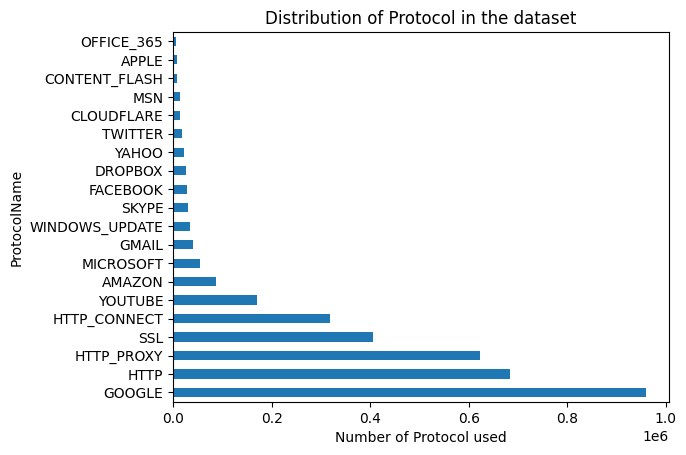

In [46]:
network_traffic_analysis_dataframe["ProtocolName"].value_counts().head(20).plot(kind="barh")
matplotlib.pyplot.xlabel("Number of Protocol used")
matplotlib.pyplot.title("Distribution of Protocol in the dataset")
matplotlib.pyplot.show()

## Analysis on TCP 3-way handshake in the dataset

### Explore the SYN Flag Count distribution

In [47]:
network_traffic_analysis_dataframe["SYN.Flag.Count"].value_counts()

SYN.Flag.Count
0    2961853
1     615443
Name: count, dtype: int64

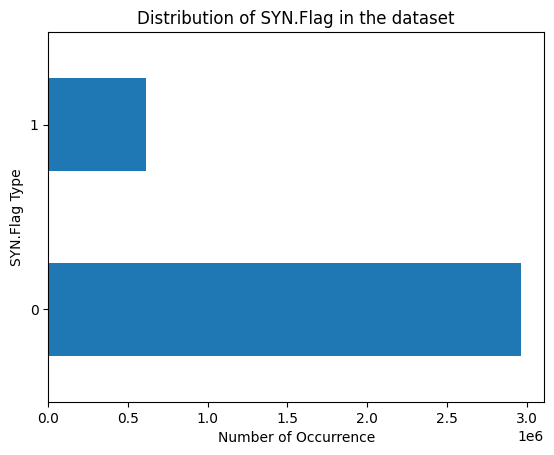

In [48]:
network_traffic_analysis_dataframe["SYN.Flag.Count"].value_counts().plot(kind="barh")
matplotlib.pyplot.xlabel("Number of Occurrence")
matplotlib.pyplot.ylabel("SYN.Flag Type")
matplotlib.pyplot.title("Distribution of SYN.Flag in the dataset")
matplotlib.pyplot.show()

In [49]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["SYN.Flag.Count"] == 0]["Protocol"].unique()

array([ 6, 17,  0])

In [50]:
network_traffic_analysis_dataframe[(network_traffic_analysis_dataframe["SYN.Flag.Count"] == 0) & (network_traffic_analysis_dataframe["Protocol"] == 6)]["Protocol"].count()

np.int64(2957532)

In [51]:
network_traffic_analysis_dataframe[(network_traffic_analysis_dataframe["SYN.Flag.Count"] == 0) & (network_traffic_analysis_dataframe["Protocol"] != 6)]["Protocol"].count()

np.int64(4321)

In [52]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["SYN.Flag.Count"] == 1]["Protocol"].unique()

array([6])

https://www.imperva.com/learn/ddos/syn-flood/ 

https://en.wikipedia.org/wiki/SYN_flood

TCP connection is initiated with SYN packet and there are higher frequency of TCP flow without SYN packets

In [53]:
network_traffic_analysis_dataframe.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

### Explore RST Flag data distribution

https://en.wikipedia.org/wiki/TCP_reset_attack 

https://www.extrahop.com/blog/tcp-resets-rst-prevent-command-and-control-dos-attacks

https://www.rfc-editor.org/info/bcp60
Inappropriate TCP resets considered harmful

In [54]:
network_traffic_analysis_dataframe["RST.Flag.Count"].value_counts()

RST.Flag.Count
0    3574915
1       2381
Name: count, dtype: int64

In [55]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["RST.Flag.Count"] == 1]["Protocol"].value_counts()

Protocol
6    2381
Name: count, dtype: int64

In [56]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["RST.Flag.Count"] == 1]

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName,Date,Time
1900,192.168.32.3-10.200.7.8-50687-3128-6,192.168.32.3,50687,10.200.7.8,3128,6,26/04/201711:11:28,118867,8,14,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY,26/04/2017,11:11:28
1943,192.168.32.3-10.200.7.8-50688-3128-6,192.168.32.3,50688,10.200.7.8,3128,6,26/04/201711:11:28,194774,8,15,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY,26/04/2017,11:11:28
2356,192.168.32.3-10.200.7.8-50699-3128-6,192.168.32.3,50699,10.200.7.8,3128,6,26/04/201711:11:29,445551,10,20,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY,26/04/2017,11:11:29
2858,192.168.32.3-10.200.7.8-50704-3128-6,192.168.32.3,50704,10.200.7.8,3128,6,26/04/201711:11:31,245917,8,14,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,131,HTTP_PROXY,26/04/2017,11:11:31
3579,192.168.32.3-10.200.7.8-50703-3128-6,192.168.32.3,50703,10.200.7.8,3128,6,26/04/201711:11:31,3466473,16,33,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,130,HTTP_CONNECT,26/04/2017,11:11:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549053,192.168.32.93-10.200.7.9-51666-3128-6,192.168.32.93,51666,10.200.7.9,3128,6,15/05/201705:21:22,431352,14,13,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,140,APPLE,15/05/2017,05:21:22
3549054,192.168.32.93-10.200.7.8-51642-3128-6,192.168.32.93,51642,10.200.7.8,3128,6,15/05/201705:19:19,90338973,29,30,...,80.0,4.514784e+07,6.746577e+04,45195545.0,45100134.0,BENIGN,126,GOOGLE,15/05/2017,05:19:19
3549061,192.168.32.93-10.200.7.8-51645-3128-6,192.168.32.93,51645,10.200.7.8,3128,6,15/05/201705:19:24,90812319,42,29,...,175.0,4.531954e+07,3.367999e+05,45557693.0,45081386.0,BENIGN,126,GOOGLE,15/05/2017,05:19:24
3549080,192.168.32.93-10.200.7.8-51665-3128-6,192.168.32.93,51665,10.200.7.8,3128,6,15/05/201705:21:11,315796,42,26,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN,126,GOOGLE,15/05/2017,05:21:11


In [57]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["RST.Flag.Count"] == 0]["Protocol"].value_counts()

Protocol
6     3570594
17       2684
0        1637
Name: count, dtype: int64

### Explore the FIN Flag Count distribution

Based on the documentation of the dataset, the FIN flag is set once the TCP connection ends.

In [58]:
network_traffic_analysis_dataframe["FIN.Flag.Count"].value_counts()

FIN.Flag.Count
0    3552122
1      25174
Name: count, dtype: int64

In [59]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["FIN.Flag.Count"] == 0]["Protocol"].unique()

array([ 6, 17,  0])

According to the documentation of the tools that was used to generate this dataset [https://www.unb.ca/cic/research/applications.html#CICFlowMeter], the TCP flow are usually terminated when there is a connection teardown by the FIN packet.

The UDP flows are terminated by flow timeout.

The high number of absence FIN packet shows weird occurence and the TCP flow are without FIN packet are abnormally high.

There is a mapping done in previous section of the notebook where the index 6 = TCP and 17 = UDP and 0 = other protocol.



### Explore the Flow Timeout value data

In the ReadMe.txt of the CICflowMeter [https://github.com/CanadianInstituteForCybersecurity/CICFlowMeter/blob/master/ReadMe.txt], the Flow duration column is measured in Microseconds.

In [60]:
network_traffic_analysis_dataframe["Flow.Duration"].describe()

count    3.577296e+06
mean     2.544247e+07
std      4.014430e+07
min      1.000000e+00
25%      6.280000e+02
50%      5.847295e+05
75%      4.500153e+07
max      1.200000e+08
Name: Flow.Duration, dtype: float64

In [61]:
def transform_microseconds_to_seconds(data: int) -> float:
    if data == 0:
        return 0.0
    
    return data / 1000000.0


In [62]:

network_traffic_analysis_dataframe["Flow.Duration"].apply(transform_microseconds_to_seconds)

0          0.045523
1          0.000001
2          0.000001
3          0.000217
4          0.078068
             ...   
3577291    2.290821
3577292    0.000024
3577293    2.591653
3577294    2.622421
3577295    2.009138
Name: Flow.Duration, Length: 3577296, dtype: float64

### Exploring the TCP PSH Packet Flag distribution

The TCP PSH flag is used for real-time application such as voice and video streaming. The delay in data transmission can cause poor user experience.

In [63]:
network_traffic_analysis_dataframe["PSH.Flag.Count"].value_counts()

PSH.Flag.Count
0    2125554
1    1451742
Name: count, dtype: int64

In [64]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["PSH.Flag.Count"] == 0]["Protocol"].value_counts()

Protocol
6     2121233
17       2684
0        1637
Name: count, dtype: int64

In [65]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["PSH.Flag.Count"] == 1]["Protocol"].value_counts()

Protocol
6    1451742
Name: count, dtype: int64

In [66]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["PSH.Flag.Count"] == 1]["ProtocolName"].value_counts().head(20)

ProtocolName
GOOGLE            407360
HTTP_CONNECT      192516
SSL               184339
HTTP              173905
HTTP_PROXY        167665
YOUTUBE            95905
AMAZON             52442
MICROSOFT          36443
WINDOWS_UPDATE     23998
GMAIL              15260
FACEBOOK           14978
SKYPE              14957
YAHOO              13503
MSN                 9748
TWITTER             9572
CLOUDFLARE          7600
CONTENT_FLASH       7213
DROPBOX             5147
APPLE               4016
OFFICE_365          2514
Name: count, dtype: int64

https://orhanergun.net/understanding-tcp-psh-packet-flag

### Exploring the TCP Ack Flag distribution

In [67]:
network_traffic_analysis_dataframe["ACK.Flag.Count"].value_counts()

ACK.Flag.Count
1    2144841
0    1432455
Name: count, dtype: int64

In [68]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["ACK.Flag.Count"] == 0]["Protocol"].value_counts()

Protocol
6     1428134
17       2684
0        1637
Name: count, dtype: int64

In [69]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["ACK.Flag.Count"] == 1]["Protocol"].value_counts()

Protocol
6    2144841
Name: count, dtype: int64

### Exploring the TCP URG flag packet distribution

In this blogpost about TCP PSH [https://orhanergun.net/tcp-psh-vs-urg-whats-the-difference], the URG flag in TCP is the Urgent Pointer field is valid in the packet. This URG flag highlights the portion of the data that requires immediate attention to the Receiver.

The Receiver will priortise processing the urgent data first before other data.

Typical use case of TCP PSH flag will be data containing control signals or error messages.

In [70]:
network_traffic_analysis_dataframe["URG.Flag.Count"].value_counts()

URG.Flag.Count
0    2585009
1     992287
Name: count, dtype: int64

In [71]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["URG.Flag.Count"] == 0]["Protocol"].value_counts()

Protocol
6     2580688
17       2684
0        1637
Name: count, dtype: int64

In [72]:
network_traffic_analysis_dataframe[network_traffic_analysis_dataframe["URG.Flag.Count"] == 1]["Protocol"].value_counts()

Protocol
6    992287
Name: count, dtype: int64

### Exploring the CWE Flag distribution

https://kb.clavister.com/317180249/explicit-congestion-notification---ecn-ece-cwe-ns-ect-ce 

https://www.catchpoint.com/blog/ece-cwr-tcp

In [73]:
network_traffic_analysis_dataframe["CWE.Flag.Count"].value_counts()

CWE.Flag.Count
0    3577296
Name: count, dtype: int64

### Exploring on the ECE flat distribution

In [74]:
network_traffic_analysis_dataframe["ECE.Flag.Count"].value_counts()

ECE.Flag.Count
0    3574947
1       2349
Name: count, dtype: int64

The ECN (Explicit Congestion Notification) is a mechanism in TCP/IP to allow Routers to signal if the Routers are almost overloaded.

ECE (Echo of Congestion Encountered) is the mark where the receiver see the packet understanding that the sender informs the receiver that it almost experience traffic congestion.

CWR (Congestion Window Reduced) 

In [75]:
network_traffic_analysis_dataframe.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

### Exploring Down Up Ratio distribution

In [76]:
network_traffic_analysis_dataframe["Down.Up.Ratio"].value_counts()

Down.Up.Ratio
0      1573265
1      1410146
2       305292
3       111856
4        72685
5        61585
6        25359
7         8727
8         3471
11        1618
9         1599
10         797
12         419
16          94
13          93
14          78
15          66
17          28
19          21
20          17
18          13
21          12
26           6
22           6
24           5
23           5
29           4
25           4
35           3
40           2
30           2
31           2
62           1
57           1
27           1
95           1
102          1
38           1
106          1
61           1
43           1
39           1
293          1
194          1
33           1
221          1
36           1
32           1
Name: count, dtype: int64

# Data Columns Removal to prepare for model training

### Create a deep copy of the dataframe containing the network traffic data

In [77]:
network_traffic_analysis_dataframe_model_training: pandas.DataFrame = network_traffic_analysis_dataframe.copy(deep=True)

### Remove Label

In [78]:
network_traffic_analysis_dataframe_model_training.drop(labels="Label", axis=1, inplace=True)

### Remove Timestamp

In [79]:
network_traffic_analysis_dataframe_model_training.drop(labels="Timestamp", axis=1, inplace=True)

### Remove date and time

In [80]:
network_traffic_analysis_dataframe_model_training.drop(labels="Date", axis=1, inplace=True)

In [81]:
network_traffic_analysis_dataframe_model_training.drop(labels="Time", axis=1,inplace=True)

### Remove ProtocolName

The protocol name is the application type that is related to the data record.

In [82]:
network_traffic_analysis_dataframe_model_training.drop(labels="ProtocolName", axis=1, inplace=True)

### Remove Flow.ID column

This is because this column Flow.ID is an identifier for each row. There is no meaning in the data therefore it should be removed.

In [83]:
network_traffic_analysis_dataframe_model_training.drop(labels="Flow.ID", axis=1, inplace=True)

### Remove Source.IP and Destination.IP

In [84]:
network_traffic_analysis_dataframe_model_training.drop(labels="Source.IP", axis=1, inplace=True)

In [85]:
network_traffic_analysis_dataframe_model_training.drop(labels="Destination.IP", axis=1, inplace=True)

In [86]:
network_traffic_analysis_dataframe_model_training.select_dtypes(["object"])

""
0
1
2
3
4
...
3577291
3577292
3577293
3577294


In [87]:
#What are the top 20 Source Ports in this dataset?

network_traffic_analysis_dataframe_model_training["Source.Port"].unique()

array([52422,  3128,    80, ...,  6507, 10192, 10182])

# Determine the linear relationship in different features

In [88]:
column_1_10_list = list(network_traffic_analysis_dataframe_model_training.columns[0:10].values)

In [89]:
column_1_10_list.append("L7Protocol")

In [90]:
"L7Protocol", 

column_1_to_10_correlation = network_traffic_analysis_dataframe_model_training[column_1_10_list].corr()

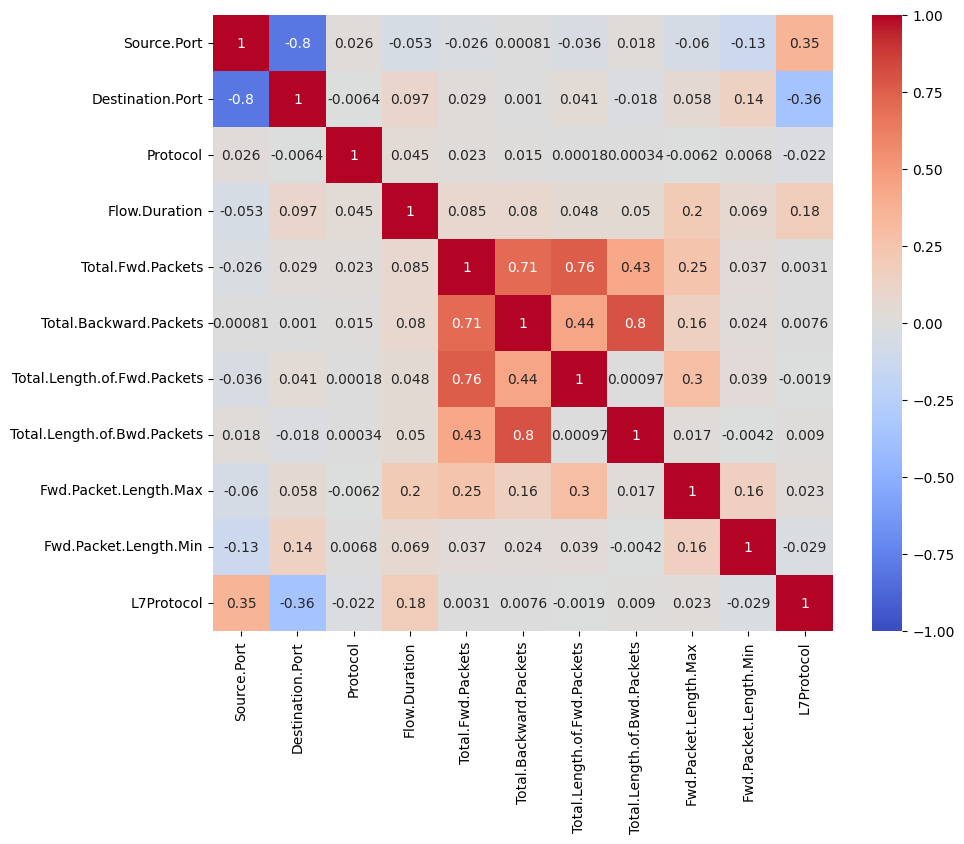

In [91]:
import seaborn as sns

matplotlib.pyplot.figure(figsize=(10, 8))
sns.heatmap(column_1_to_10_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
matplotlib.pyplot.show()


There are too many variables to consider in this case, the dimension reduction method will be used to determine the best features variable. 

# Data Analysis Conclusion

To conclude the EDA, there are too much variable to reduce the dimension effectively and to determine which condition would likely be classified as Malignant or Benign in order to determine if there is an event of network intrusion.

It is possible to use deep learning with the help of other dataset to predict the Label column whether is the record "Malignant" or "Benign", however, it will be resource intensive to continue this direction.

Therefore, the analysis focus will be on how to determine the type of application 'L7Protocol' based on the other columns or features in the dataset since the initial data analysis shows L7Protocol and its relationship with other ProtocolName column.

In the description of this Kaggle dataset "IP Network Traffic Flows Labeled with 75 Apps", there is a statement which explicitly states the layer 7 protocol (application) used on that flow as the class which means the column "L7Protocol" is the target variable in this dataset.

# Determine independent variables (Features) and dependent variable (Target)

L7Protocol column should be the target variable since the current direction of the analysis is to determine which Protocol each session based data transaction could correspond to.



In [92]:
network_traffic_analysis_dataframe_model_training.columns

Index(['Source.Port', 'Destination.Port', 'Protocol', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.

The rest of the columns in the dataframe after removal of the text data and other than the L7Protocol column are the features

# Analysis on the current dataframe before model building

### Checking for class imbalance

In [93]:
target_variable_class_distribution = network_traffic_analysis_dataframe_model_training["L7Protocol"].value_counts()

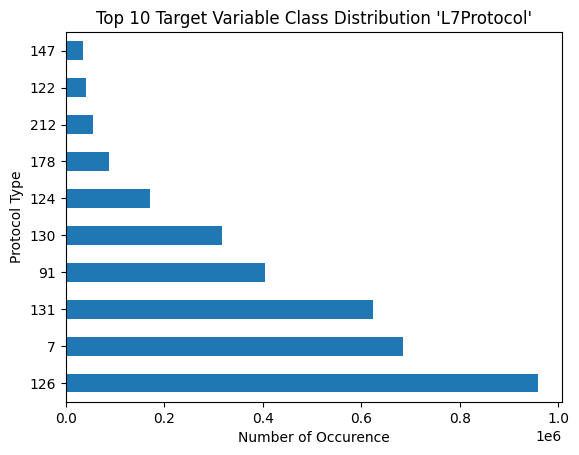

In [94]:
target_variable_class_distribution.head(10).plot(kind="barh")
matplotlib.pyplot.ylabel("Protocol Type")
matplotlib.pyplot.xlabel("Number of Occurence")
matplotlib.pyplot.title("Top 10 Target Variable Class Distribution 'L7Protocol'")
matplotlib.pyplot.show()



In [95]:
maximum_value_for_classes = network_traffic_analysis_dataframe_model_training["L7Protocol"].max()
minimum_value_for_classes = network_traffic_analysis_dataframe_model_training["L7Protocol"].min()

class_imbalance_ratio = maximum_value_for_classes / minimum_value_for_classes

print(f"Classes Imbalance Ratio: {class_imbalance_ratio}")

Classes Imbalance Ratio: 222.0


In [96]:
target_variable_class_percentages = (target_variable_class_distribution / len(network_traffic_analysis_dataframe_model_training["L7Protocol"])) * 100

print(target_variable_class_percentages)

L7Protocol
126    26.811033
7      19.113151
131    17.421259
91     11.318130
130     8.876146
         ...    
213     0.000084
48      0.000056
11      0.000028
202     0.000028
172     0.000028
Name: count, Length: 78, dtype: float64


There are significant class imbalance for target variable.

# Prepare the Train, Validation and Test dataset

* Split the dataset into training and testing sets.

### Create Train Dataset and Test Dataset

The current dataset distribution is at 80% Train_Validation and 20% Test

In [97]:
train_validation_dataset, test_dataset = train_test_split(network_traffic_analysis_dataframe_model_training, train_size = 0.8, test_size = 0.2, random_state=1, shuffle=True)

Current dataset distribution after train test split

- Train dataset: 60% (0.8 * 0.75)
- Test dataset: 20% 
- Validation dataset: 20% (0.8 * 0.25) 

In [98]:
train_dataset, validation_dataset = train_test_split(train_validation_dataset, train_size=0.75, test_size=0.25, random_state=1, shuffle=True)

In [99]:
train_dataset_features = train_dataset.drop(labels="L7Protocol", axis=1)
train_dataset_target = train_dataset["L7Protocol"]

In [100]:
validation_dataset_features = validation_dataset.drop(labels="L7Protocol", axis=1)
validation_dataset_target = validation_dataset["L7Protocol"]

In [101]:
test_dataset_features = test_dataset.drop(labels="L7Protocol", axis=1)
test_dataset_target = test_dataset["L7Protocol"]

Split the dataset to X and Y variant

### Perform min-max normalization on all datasets

In [102]:
def min_max_normalization(input_data: float, minimum_value: float, maximum_value: float) -> float:
    
    # Function output range: [0, 1]

    if (maximum_value - minimum_value) == 0:
        return 0.0

    result_min_max_value = (input_data - minimum_value) / (maximum_value - minimum_value)
    
    return result_min_max_value

In [103]:
def apply_min_max_normalization_in_the_dataframe(dataframe: pandas.DataFrame) -> pandas.DataFrame:

    transformed_min_max_normalization_data: dict = {}

    for data_column in dataframe.columns:

        data_column_minimum_value: float = dataframe[data_column].min()
        data_column_maximum_value: float = dataframe[data_column].max()

        transformed_data_column: pandas.Series = dataframe[data_column].apply(lambda data: min_max_normalization(data, minimum_value=data_column_minimum_value, maximum_value=data_column_maximum_value))

        transformed_min_max_normalization_data[data_column] = transformed_data_column

    
    transformed_dataframe: pandas.DataFrame = pandas.DataFrame(data = transformed_min_max_normalization_data)
    
    if transformed_dataframe.columns.difference(validation_dataset.columns).empty == True:
        return transformed_dataframe
    else:
        raise Exception("There is a mismatch in the new dataframe.")

    return None

    


In [104]:
train_dataset_normalized = apply_min_max_normalization_in_the_dataframe(train_dataset_features)
validation_dataset_normalized = apply_min_max_normalization_in_the_dataframe(validation_dataset_features)
test_dataset_normalized = apply_min_max_normalization_in_the_dataframe(test_dataset_features)

In [105]:
train_dataset_normalized

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
2829033,0.807840,0.047731,0.352941,0.000004,0.000009,0.000005,4.424625e-08,1.368621e-08,0.000183,0.000691,...,0.000012,0.416667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1799074,0.047731,0.792886,0.352941,0.054740,0.000015,0.000020,9.797594e-06,1.031028e-06,0.105263,0.000000,...,0.000021,0.416667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2412808,0.609790,0.001221,0.352941,0.003180,0.000011,0.000010,1.165151e-06,2.657405e-07,0.016661,0.000000,...,0.000006,0.666667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1408912,0.755272,0.006760,0.352941,0.004185,0.000011,0.000010,8.259300e-07,1.573914e-07,0.015747,0.000000,...,0.000006,0.666667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1548715,0.556795,0.006760,0.352941,0.078803,0.000026,0.000025,3.218177e-06,6.466733e-07,0.042550,0.000000,...,0.000015,0.666667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446753,0.614658,0.006760,0.352941,0.000006,0.000000,0.000005,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.666667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
878231,0.630238,0.001221,0.352941,0.000100,0.000004,0.000007,2.477790e-07,0.000000e+00,0.005117,0.000000,...,0.000003,0.666667,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
106371,0.047731,0.883206,0.352941,0.867055,0.000088,0.000017,2.598730e-06,3.615440e-07,0.001827,0.000691,...,0.000122,0.416667,1.170951e-03,0.002309,3.353101e-03,4.381446e-04,0.215538,0.023618,0.235963,0.200993
3397935,0.047731,0.790811,0.352941,0.344832,0.000042,0.000010,4.309290e-05,1.368621e-08,0.088938,0.000691,...,0.000058,0.416667,1.569379e-07,0.000000,1.569379e-07,1.569379e-07,0.344762,0.000000,0.344762,0.344762


# Model Building


* Implement at least three different classification models (e.g., Decision Tree, Random Forest, SVM, etc.).
* Train and fine-tune each model using appropriate techniques.
* Discuss the choice of hyperparameters and the reasoning behind it

## Creating a subset of the dataset 

These dataset have been preprocessed in the "Prepare the Train, Validation and Test Dataset" section.

The original datasets are created from the main dataset retrieve from Kaggle where the data have been splitted and randomly shuffle.

In [106]:

train_dataset_normalized_subset = train_dataset_normalized.iloc[:10000]
train_dataset_target_subset = train_dataset_target.iloc[:10000]

validation_dataset_normalized_subset = validation_dataset_normalized.iloc[:10000]
validation_dataset_target_subset = validation_dataset_target.iloc[:10000]


test_dataset_normalized_subset = test_dataset_normalized.iloc[:10000]
test_dataset_target_subset = test_dataset_target.iloc[:10000]

## Finding the best hyperparameter for best classification performance (Optional)

In [104]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold


#### Find the best hyperparameter for dimension reduction using RandomForestClassifier

In [ ]:
# 5. RandomForestClassifier GridSearchCV
cross_validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

random_forest_classifier_parameter_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

random_forest_classifier_model = RandomForestClassifier(random_state=42)


random_forest_classifier_grid = GridSearchCV(random_forest_classifier_model, random_forest_classifier_parameter_grid, cv=cross_validator, n_jobs=10, verbose=2)

print("Fitting Random Forest GridSearchCV...")
random_forest_classifier_grid.fit(train_dataset_normalized_subset, train_dataset_target_subset)


print("Best Parameters for Random Forest:", random_forest_classifier_grid.best_params_)


print("Random Forest Test Accuracy:", random_forest_classifier_grid.best_estimator_.score(test_dataset_normalized_subset, test_dataset_target_subset))


In [ ]:
cross_validator = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

# 1. Support Vector Machine (SVM) GridSearchCV
support_vector_machine_parameter_grid: dict = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  # Only for 'rbf' and 'poly' kernels
    'degree': [3, 4]  # Only for 'poly' kernel
}

support_vector_machine_model = SVC()

# 2. Decision Tree GridSearchCV
decision_tree_parameter_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

# 3. Bagging Classifier GridSearchCV (using Decision Tree as base estimator)
bagging_classifier_parameter_grid = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

bagging = BaggingClassifier(random_state=42)

# 4. Logistic Regression GridSearchCV
logistic_regression_parameter_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # You can try 'l1' or 'elasticnet' depending on solver
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

logistic_regression_model = LogisticRegression()


# Initialize GridSearchCV for each model
support_vector_machine_grid = GridSearchCV(support_vector_machine_model, support_vector_machine_parameter_grid, cv=cross_validator, n_jobs=10, verbose=2)
decision_tree_model_grid = GridSearchCV(decision_tree_model, bagging_classifier_parameter_grid, cv=cross_validator, n_jobs=10, verbose=2)
bagging_classifier_grid = GridSearchCV(bagging, bagging_classifier_parameter_grid, cv=cross_validator, n_jobs=10, verbose=2)
logistic_regression_grid = GridSearchCV(logistic_regression_model, logistic_regression_parameter_grid, cv=cross_validator, n_jobs=10, verbose=2)


# Fit each GridSearchCV on the training data
print("Fitting SVM GridSearchCV...")
support_vector_machine_grid.fit(train_dataset_normalized, train_dataset_target)

print("Fitting Decision Tree GridSearchCV...")
decision_tree_model_grid.fit(train_dataset_normalized, train_dataset_target)

print("Fitting Bagging Classifier GridSearchCV...")
bagging_classifier_grid.fit(train_dataset_normalized, train_dataset_target)

print("Fitting Logistic Regression GridSearchCV...")
logistic_regression_grid.fit(train_dataset_normalized, train_dataset_target)



# Print the best parameters and best score for each model
print("\nBest Parameters for SVM:", support_vector_machine_grid.best_params_)
print("Best Parameters for Decision Tree:", decision_tree_model_grid.best_params_)
print("Best Parameters for Bagging Classifier:", bagging_classifier_grid.best_params_)
print("Best Parameters for Logistic Regression:", logistic_regression_grid.best_params_)

# Evaluate the best models on the test set
print("\nSVM Test Accuracy:", support_vector_machine_grid.best_estimator_.score(test_dataset_normalized, test_dataset_target))
print("Decision Tree Test Accuracy:", decision_tree_model_grid.best_estimator_.score(test_dataset_normalized, test_dataset_target))
print("Bagging Classifier Test Accuracy:", bagging_classifier_grid.best_estimator_.score(test_dataset_normalized, test_dataset_target))
print("Logistic Regression Test Accuracy:", logistic_regression_grid.best_estimator_.score(test_dataset_normalized, test_dataset_target))




## Dimension Reduction using Random Forest

Test Configuration

Dataset Sizes:
- Train Dataset: 10000 records
- Test Dataset: 10000 records
- Validation Dataset: 10000 records



Focus on the hyperparameter selection

The selection of the hyperparameter for RandomForestClassifier is focus on dimension reduction in the dataset from 80 features.

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [100]:


random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=10, max_features='sqrt', min_samples_split=5 ,random_state=5)

random_forest_classifier.fit(train_dataset_normalized_subset, train_dataset_target_subset)
# Typically this model would finish in 14 minutes 51 seconds


RandomForestClassifier(max_depth=10, max_features=9, min_samples_split=5,
                       n_estimators=500, random_state=5)

In [101]:
joblib.dump(random_forest_classifier, "dimension_reduction_random_forest_classifier.pkl")

['dimension_reduction_random_forest_classifier.pkl']

In [107]:
random_forest_classifier = joblib.load('dimension_reduction_random_forest_classifier.pkl')

In [108]:
test_data_prediction_outcome = random_forest_classifier.predict(test_dataset_normalized_subset)

In [109]:
test_dataset_accuracy_random_forest_classifier: float = random_forest_classifier.score(test_dataset_normalized_subset, test_dataset_target_subset)

In [110]:
validation_dataset_accuracy_score_random_forest_classifier: float = random_forest_classifier.score(validation_dataset_normalized_subset, validation_dataset_target_subset)

#### Generating the feature importance from Random Forest Classifier

In [111]:
feature_importance_dataframe = pandas.DataFrame({
                                                "feature": train_dataset_normalized_subset.columns, 
                                                "Importance": random_forest_classifier.feature_importances_
                                                })

##### Selecting all feature that has at least 0.01 value

In [112]:
feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01]

,feature,Importance
0,Source.Port,0.072462
1,Destination.Port,0.139943
3,Flow.Duration,0.022077
4,Total.Fwd.Packets,0.011741
6,Total.Length.of.Fwd.Packets,0.012992
7,Total.Length.of.Bwd.Packets,0.010506
8,Fwd.Packet.Length.Max,0.015284
9,Fwd.Packet.Length.Min,0.014831
10,Fwd.Packet.Length.Mean,0.015213
11,Fwd.Packet.Length.Std,0.012380


##### Summing up the importance value for all features

In [113]:
feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01]["Importance"].sum()

np.float64(0.8638345540870589)

The sum of importance for all features above the value of 0.01 for Importance column is at 0.80.


In [114]:
feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01].count()

feature       44
Importance    44
dtype: int64

The number of feature importance that are above 1 % is random and based on the current set of generated data from the dataset.

In [115]:
print(f"This means only {feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01].count()[0]} columns will remain in the current dataset.")

This means only 44 columns will remain in the current dataset.


C:\Users\angko\AppData\Local\Temp\ipykernel_17708\116590637.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"This means only {feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01].count()[0]} columns will remain in the current dataset.")


In [116]:
columns_to_retain = feature_importance_dataframe[feature_importance_dataframe["Importance"] > 0.01]["feature"]

In [259]:
columns_to_retain.values

array(['Source.Port', 'Destination.Port', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Bwd.IAT.Total', 'Bwd.IAT.Max', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
       'Packet.Length.Std', 'Packet.Length.Variance',
       'Average.Packet.Size', 'Avg.Fwd.Segment.Size',
       'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',

##### Reducing the dimension based on the finding from the RandomForestClassifier

In [118]:
train_dataset_normalized_subset_reduced = train_dataset_normalized_subset[columns_to_retain.values]
validation_dataset_normalized_subset_reduced = validation_dataset_normalized_subset[columns_to_retain.values]
test_dataset_normalized_subset_reduced = test_dataset_normalized_subset[columns_to_retain.values]

## Classification Model Training

### SVM Classifier

In [127]:
from sklearn.svm import SVC

SVC Hyperparameter Elaboration

The focus on these selection of hyperparameter are about classification performance.

- C = 10 
    - This hyperparameter controls the trade off between the minimizing of the model complexity and fitting the data well on the model
- Kernel = 'rbf'
    - rbf is selected as the kernel due to non-linear data 
- gamma = 1
    - This hyperparameter determine the influence of the training sample and it makes the model more sensitive to data point if the gamma value is high
- class_weight = 'balanced'
    - class_weight is set to balanced due to the discovery of imbalance classes in the target variable L7Protocol


In [112]:
support_vector_machine_classifier_model = SVC(C=10,kernel='rbf', gamma=1, class_weight="balanced")

support_vector_machine_classifier_model.fit(train_dataset_normalized_subset_reduced, train_dataset_target_subset)


SVC(C=10, class_weight='balanced', gamma=1)

#### Saving SVM model

In [124]:
joblib.dump(support_vector_machine_classifier_model, "support_vector_machine_classifier.pkl")

['support_vector_machine_classifier.pkl']

#### Loading SVM model

In [119]:
support_vector_machine_classifier_model = joblib.load("support_vector_machine_classifier.pkl")

#### Determine the performance of the SVM Classifier

In [122]:
validation_dataset_accuracy_score_svc = support_vector_machine_classifier_model.score(validation_dataset_normalized_subset_reduced, validation_dataset_target_subset)

In [123]:
validation_dataset_accuracy_score_svc

0.218

#### Retrieve Prediction data for SVC

In [209]:
support_vector_machine_classifier_prediction_data = support_vector_machine_classifier_model.predict(test_dataset_normalized_subset_reduced)

### Random Forest

Using Random Forest Classifier again after reducing the dimension (features) in the dataset.

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Hyperparameter Elaboration

The focus on these selection of hyperparameter are about classification performance.

- n_estimators
    - Determine the number of trees in the forest and more trees reduces the variances in the dataset
- max_depth
    - The maximum depth of each decision tree and this hyperparameter helps to prevent overfitting.
- max_features = 'sqrt'
    - This hyperparameter selection is best for classification and large dataset and the purpose is to split the dataset based on the sqrt(number of features)
- min_samples_split = 5
    - This hyperparameter determines the minimum number of samples required to split 1 internal node in the tree

In [116]:


random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=10, max_features='sqrt', min_samples_split=5 ,random_state=5)

random_forest_classifier.fit(train_dataset_normalized_subset_reduced, train_dataset_target_subset)

RandomForestClassifier(max_depth=10, max_features=9, min_samples_split=5,
                       n_estimators=500, random_state=5)

#### Saving the Random Forest Classifier model

In [120]:
joblib.dump(random_forest_classifier, "random_forest_classifier.pkl")

['random_forest_classifier.pkl']

#### Loading the Random Forest Classifier model

In [203]:
random_forest_classifier = joblib.load("random_forest_classifier.pkl")

#### Determine the Random Forest Classifier Model Performance

In [128]:
test_dataset_accuracy_random_forest_classifier: float = random_forest_classifier.score(test_dataset_normalized_subset_reduced, test_dataset_target_subset)

In [129]:
test_dataset_accuracy_random_forest_classifier

0.6187

In [130]:
validation_dataset_accuracy_random_forest_classifier: float = random_forest_classifier.score(validation_dataset_normalized_subset_reduced, validation_dataset_target_subset)

In [131]:
validation_dataset_accuracy_random_forest_classifier

0.5855

#### Predict Probability in Random Forest Classifier

In [204]:
random_forest_classifier_predict_proba =  random_forest_classifier.predict_proba(test_dataset_normalized_subset_reduced)

#### Retrieve Prediction Data in Random Forest Classifier

In [201]:
random_forest_classifier_prediction_data = random_forest_classifier.predict(test_dataset_normalized_subset_reduced)

### Decision Tree

Decision Tree Hyperparameter elaboration

The focus on these selection of hyperparameter are about classification performance.

- criterion
    - This hyperparameter defines the measurement of the quality of a split. The decision tree would use this function to split into other tree nodes.
    - The consideration in this case would be speed and consistency so gini is selected.
- max_depth
    - This hyperparameter determine how many levels can a tree grow. 
    - This hyperparameter can reduce the model complexity if lesser value are selected.
- min_samples_split
    - This hyperparameter is about defining the minimum number of samples required to split in an internal node.
    - This can help to reduce the risk of overfitting with the increase of value.
- min_samples_leaf
    - This hyperparameter is about the minimum number of samples required to be at the leaf node which means 1 leaf node how many child node can a leaf node have.
    - This hyperparameter can help the decision tree to be more conservative and prevents overfitting.
- max_features
    - This hyperparameter helps the decision tree to consider the number of features when attempting to split and this hyperparameter can lead to less complex tree with the reduction in this value within this hyperparameter to prevent overfitting
    - This hyperparameter also helps in reduction of variance and model complexity with smaller max_features
- min_impurity_decrease
    - This hyperparameter helps to reduce the chances of splitting the tree that does not provide meaningful information.
    - The condition for this hyperparameter is to provide a threshold that defines the impurity and if the impurity value is greater or equal to this value then the node can be split.
- class_weight
    - The class_weight hyperparameter is about dealing with imbalance classes (target variable). By setting "balanced" in this hyperparameter, the weights will be automatically adjusted inversely proportional to class that are frequent appearing in the target variable thus giving classes that are few in the dataset more proportion.


In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


decision_tree_classifier_model = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_split=10, min_samples_leaf= 10, 
                                                        max_features='sqrt', 
                                                        max_leaf_nodes= 50,
                                                        min_impurity_decrease = 0.1,
                                                        class_weight='balanced', random_state=42)

decision_tree_classifier_model.fit(train_dataset_normalized_subset_reduced, train_dataset_target_subset)


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=50,
                       min_impurity_decrease=0.1, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

#### Saving the Decision Tree Classifier Model

In [204]:
joblib.dump(decision_tree_classifier_model, "decision_tree_classifier_model.pkl")

['decision_tree_classifier_model.pkl']

#### Loading the Decision Tree Classifier model

In [222]:
decision_tree_classifier_model = joblib.load("decision_tree_classifier_model.pkl")

#### Determine the Decision Tree Classifier Model Performance

In [223]:
validation_dataset_accuracy_score_decision_tree_classifier_model = decision_tree_classifier_model.score(validation_dataset_normalized_subset_reduced, validation_dataset_target_subset)

In [224]:
validation_dataset_accuracy_score_decision_tree_classifier_model

0.2676

#### Predict Probability in Decision Tree Classifier model

In [225]:
decision_tree_model_predict_proba =  decision_tree_classifier_model.predict_proba(test_dataset_normalized_subset_reduced)

#### Retrieve Prediction data for Decision Tree Classifier Model

In [226]:
test_dataset_predict_decision_tree_classifier = decision_tree_classifier_model.predict(test_dataset_normalized_subset_reduced)

### Logistic Regression

Logistic Regression Hyperparameter elaboration

The focus on these selection of hyperparameter are about classification performance.

- C = 1000
    - indicate the balance between the stronger regularization to prevent overfitting and allowing the model to fit the data more flexibly
- Penalty = l2 
    - since the feature and data records are relatively large of 10000 records. I think L2 penalty is sufficient where this L2 penalty works well with large dataset
- solver = 'lbfgs' 
    - this solver is the default configuration and it supports l2 penalty. This is the optimization algorithm
- max_iter = 1900 
    - this refers to the maximum iteration for the solver to converge
- tol = 1e-6 
    - this configuration is the criteria for stopping the solver when the cost function is less than this tolerance value. The smaller tolerance value would help in large dataset.
- class_weight = 'balanced'
    - this configuration helps to automatically adjust the weights of the imbalanced classes in the target variable thus giving more importance to the less represented classes
 

In [146]:
from sklearn.linear_model import LogisticRegression




logistic_regression_model = LogisticRegression(C=1000, penalty='l2', max_iter = 1900, tol=0.00001, class_weight='balanced')


logistic_regression_model.fit(train_dataset_normalized_subset_reduced, train_dataset_target_subset)

LogisticRegression(C=1000, class_weight='balanced', max_iter=1900, tol=1e-05)

#### Save the Logistic Regression Model

In [206]:
joblib.dump(logistic_regression_model, "logistic_regression_model.pkl")

['logistic_regression_model.pkl']

#### Load Logistic Regression Model

In [135]:
logistic_regression_model = joblib.load("logistic_regression_model.pkl")

#### Determine the Logistic Regression Model Performance

In [136]:
test_dataset_accuracy_logistic_regression_model: float = logistic_regression_model.score(test_dataset_normalized_subset_reduced, test_dataset_target_subset)

In [137]:
test_dataset_accuracy_logistic_regression_model

0.1815

In [138]:
validation_dataset_accuracy_score_logistic_regression_model = logistic_regression_model.score(validation_dataset_normalized_subset_reduced, validation_dataset_target_subset)

In [139]:
validation_dataset_accuracy_score_logistic_regression_model

0.0599

#### Predict Probability in Logistic Regression Model

In [140]:
logistics_regression_model_predict_proba =  logistic_regression_model.predict_proba(test_dataset_normalized_subset_reduced)

#### Retrieve Prediction data in Logistic Regression Model

In [258]:
test_dataset_predict_logistic_regression = logistic_regression_model.predict(test_dataset_normalized_subset_reduced)

# Model Evaluation

* Evaluate the models using appropriate classification metrics (accuracy, precision, recall, F1-score, etc.).
* Visualize the model performance using ROC curves and confusion matrices.


In [133]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

## Metric used for all Models

The metric used for all model will be f1-score and accuracy. This is because the dataset is about network flow and to determine the application type based on the network data record in the dataset is important.

The ability to predict the correct result for the model is equally important while the f1-score is a reliablity metric.

## SVC Model Evaluation

In [286]:
print(classification_report(test_dataset_target_subset, support_vector_machine_classifier_prediction_data))

              precision    recall  f1-score   support

           5       0.27      0.43      0.33         7
           7       0.75      0.56      0.64      1978
           9       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          40       0.02      0.58      0.04        24
          64       0.00      0.00      0.00         3
          68       0.03      0.10      0.04        42
          70       0.02      0.03      0.02        70
          81       1.00      1.00      1.00         6
          91       0.30      0.18      0.22      1150
         114       0.00      0.00      0.00         1
         119       0.16      0.13      0.14        84
         120       0.01      0.02      0.01        43
         121       0.29      0.65      0.40        81
         122       0.03      0.20      0.06       102
         123       0.00      0.00      0.00         2
         124       0.38      0.15      0.21       472
         125       0.05    

c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

#### Confusion Matrix for SVC

In [280]:
confusion_matrix_svc = confusion_matrix(test_dataset_target_subset, support_vector_machine_classifier_prediction_data)

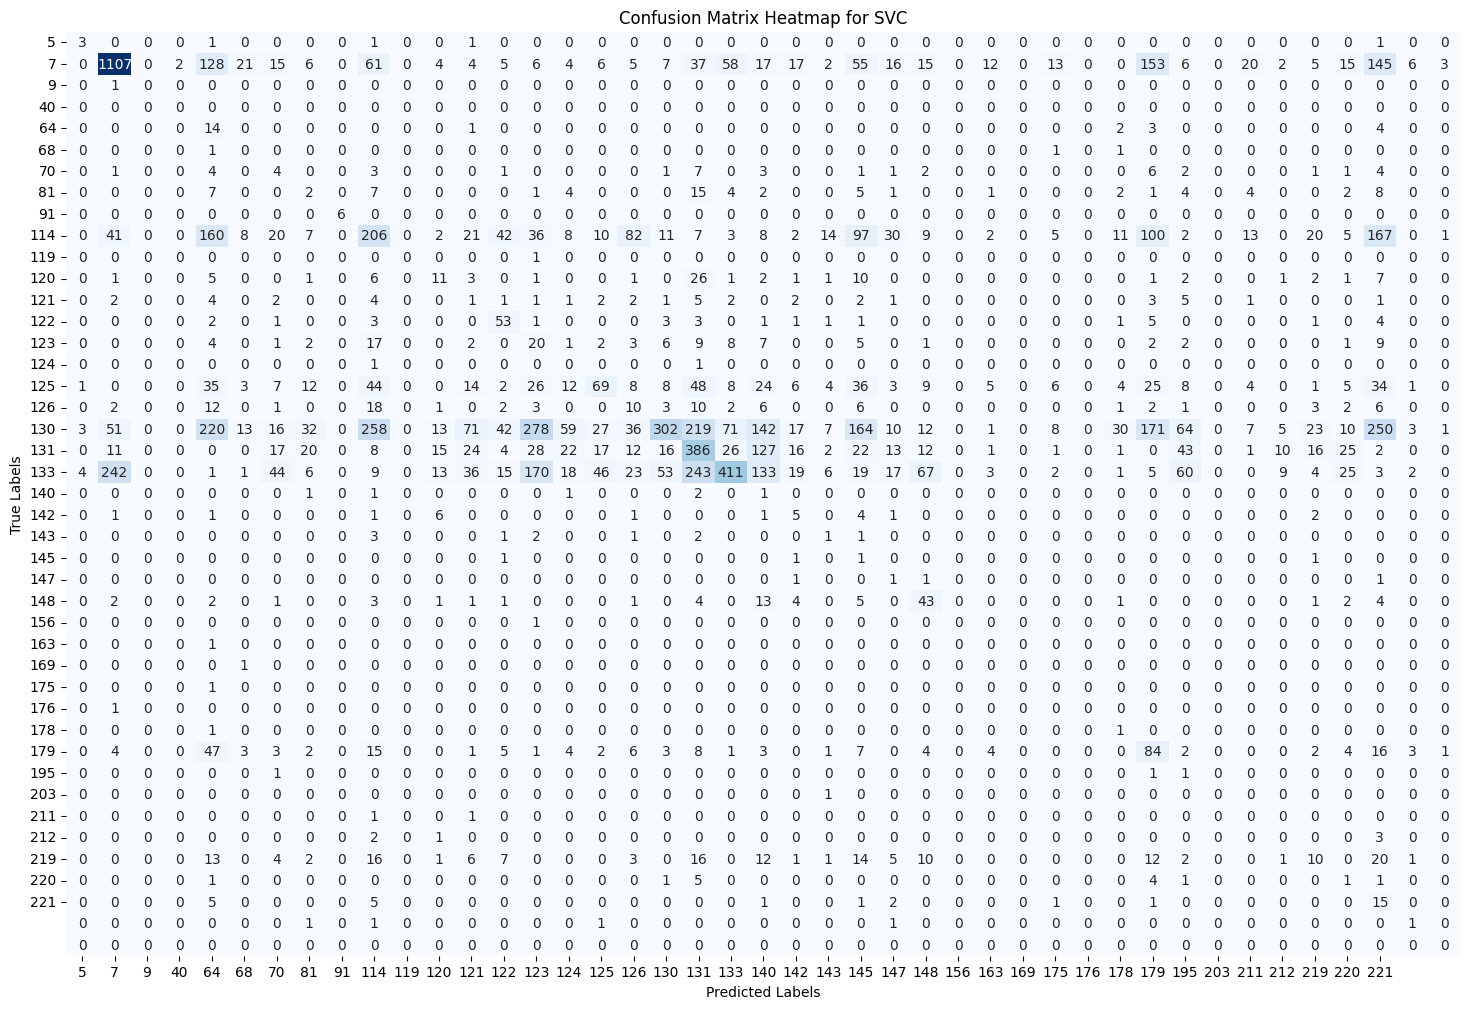

In [284]:
matplotlib.pyplot.figure(figsize=(18, 12))
seaborn.heatmap(confusion_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=test_dataset_target_subset.sort_values().unique(), yticklabels=test_dataset_target_subset.sort_values().unique())


matplotlib.pyplot.xlabel("Predicted Labels")
matplotlib.pyplot.ylabel("True Labels")

matplotlib.pyplot.title("Confusion Matrix Heatmap for SVC")

matplotlib.pyplot.show()

There are 38 classes in this heatmap to represent the confusion matrix. 

#### Reference on the L7Protocol integer using a Dictionary

It is possible to reference the actual protocol mapping based on the integer found in the heatmap by using a dictionary "l7_protocol_index_to_name_mapping".

In [ ]:
l7_protocol_index_to_name_mapping

{np.int64(131): 'HTTP_PROXY',
 np.int64(7): 'HTTP',
 np.int64(130): 'HTTP_CONNECT',
 np.int64(91): 'SSL',
 np.int64(126): 'GOOGLE',
 np.int64(124): 'YOUTUBE',
 np.int64(119): 'FACEBOOK',
 np.int64(40): 'CONTENT_FLASH',
 np.int64(121): 'DROPBOX',
 np.int64(147): 'WINDOWS_UPDATE',
 np.int64(178): 'AMAZON',
 np.int64(212): 'MICROSOFT',
 np.int64(163): 'TOR',
 np.int64(122): 'GMAIL',
 np.int64(70): 'YAHOO',
 np.int64(68): 'MSN',
 np.int64(64): 'SSL_NO_CERT',
 np.int64(125): 'SKYPE',
 np.int64(221): 'MS_ONE_DRIVE',
 np.int64(114): 'MSSQL',
 np.int64(120): 'TWITTER',
 np.int64(143): 'APPLE_ICLOUD',
 np.int64(220): 'CLOUDFLARE',
 np.int64(169): 'UBUNTUONE',
 np.int64(219): 'OFFICE_365',
 np.int64(176): 'WIKIPEDIA',
 np.int64(201): 'OPENSIGNAL',
 np.int64(5): 'DNS',
 np.int64(60): 'HTTP_DOWNLOAD',
 np.int64(142): 'WHATSAPP',
 np.int64(145): 'APPLE_ITUNES',
 np.int64(175): 'FTP_DATA',
 np.int64(132): 'CITRIX',
 np.int64(140): 'APPLE',
 np.int64(222): 'MQTT',
 np.int64(211): 'INSTAGRAM',
 np.int

## Random Forest Classifier Model Evaluation

#### Classification Report

In [216]:
print(classification_report(test_dataset_target_subset, random_forest_classifier_prediction_data))

              precision    recall  f1-score   support

           5       0.30      0.43      0.35         7
           7       0.75      0.88      0.81      1978
           9       0.00      0.00      0.00         1
          40       0.00      0.00      0.00        24
          64       0.00      0.00      0.00         3
          68       0.00      0.00      0.00        42
          70       0.00      0.00      0.00        70
          81       1.00      1.00      1.00         6
          91       0.60      0.66      0.63      1150
         114       0.00      0.00      0.00         1
         119       0.88      0.26      0.40        84
         120       0.00      0.00      0.00        43
         121       0.93      0.53      0.68        81
         122       0.00      0.00      0.00       102
         123       0.00      0.00      0.00         2
         124       0.61      0.18      0.28       472
         125       0.00      0.00      0.00        91
         126       0.56    

c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Confusion Matrix for Random Forest Classifier

In [217]:
confusion_matrix_random_forest = confusion_matrix(test_dataset_target_subset, random_forest_classifier_prediction_data)

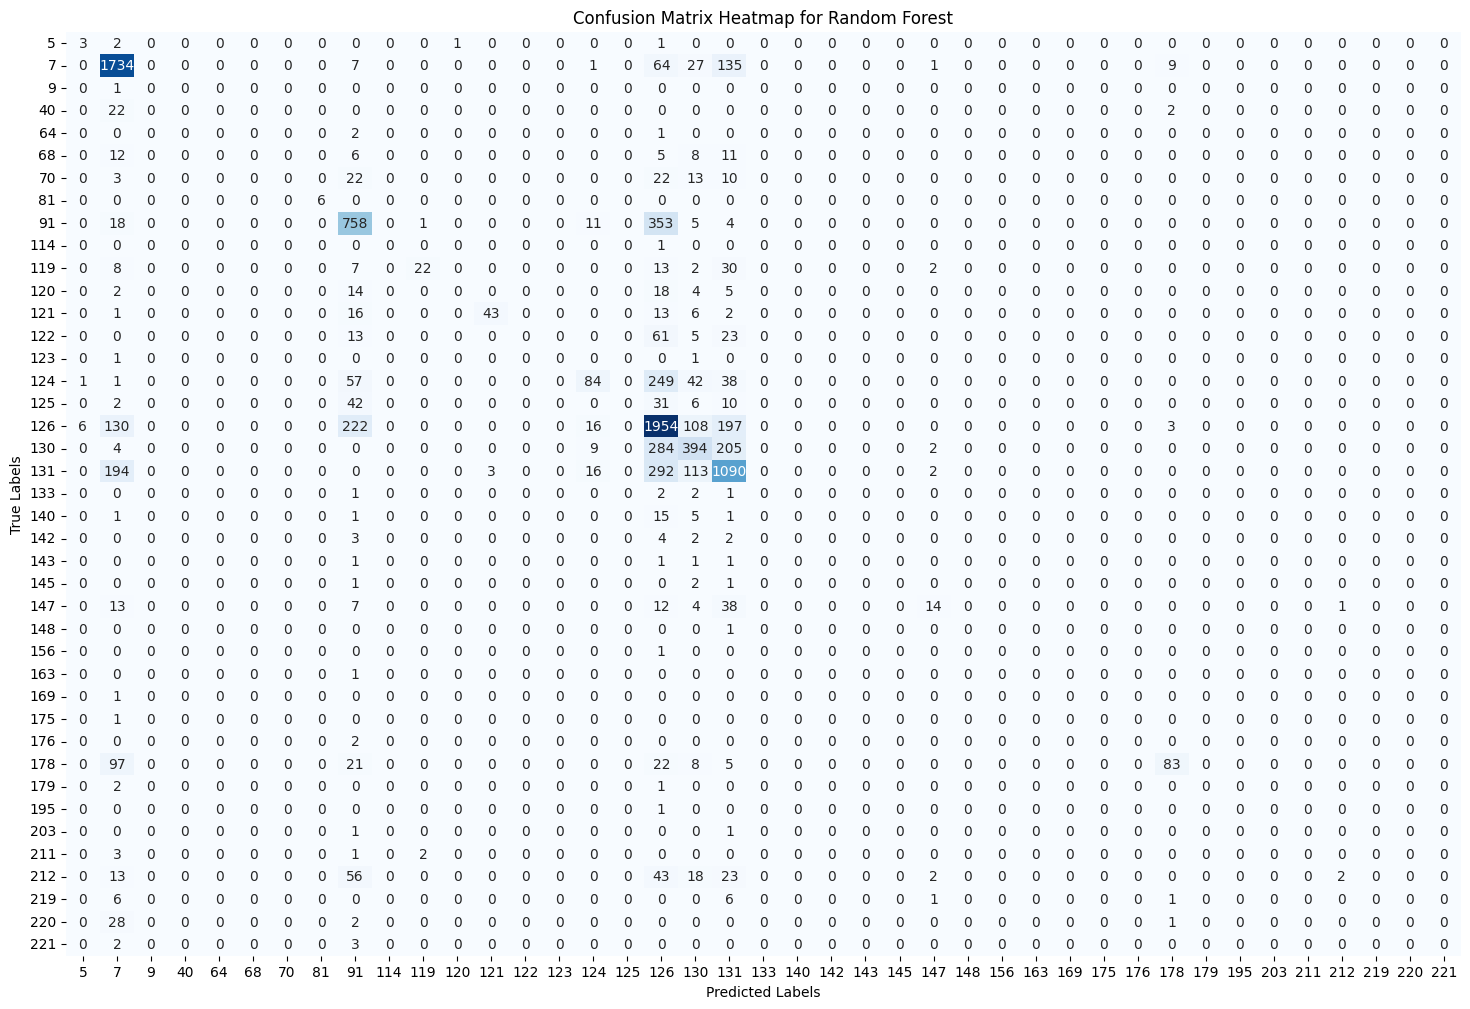

In [254]:
matplotlib.pyplot.figure(figsize=(18, 12))
seaborn.heatmap(confusion_matrix_random_forest, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=test_dataset_target_subset.sort_values().unique(), yticklabels=test_dataset_target_subset.sort_values().unique())

#matplotlib.pyplot.xticks(, logistic_regression_model.classes_)

matplotlib.pyplot.xlabel("Predicted Labels")
matplotlib.pyplot.ylabel("True Labels")

matplotlib.pyplot.title("Confusion Matrix Heatmap for Random Forest")

matplotlib.pyplot.show()

There are 38 classes in this heatmap to represent the confusion matrix. 

#### Reference on the L7Protocol integer using a Dictionary

It is possible to reference the actual protocol mapping based on the integer found in the heatmap by using a dictionary "l7_protocol_index_to_name_mapping".

In [219]:
l7_protocol_index_to_name_mapping

{np.int64(131): 'HTTP_PROXY',
 np.int64(7): 'HTTP',
 np.int64(130): 'HTTP_CONNECT',
 np.int64(91): 'SSL',
 np.int64(126): 'GOOGLE',
 np.int64(124): 'YOUTUBE',
 np.int64(119): 'FACEBOOK',
 np.int64(40): 'CONTENT_FLASH',
 np.int64(121): 'DROPBOX',
 np.int64(147): 'WINDOWS_UPDATE',
 np.int64(178): 'AMAZON',
 np.int64(212): 'MICROSOFT',
 np.int64(163): 'TOR',
 np.int64(122): 'GMAIL',
 np.int64(70): 'YAHOO',
 np.int64(68): 'MSN',
 np.int64(64): 'SSL_NO_CERT',
 np.int64(125): 'SKYPE',
 np.int64(221): 'MS_ONE_DRIVE',
 np.int64(114): 'MSSQL',
 np.int64(120): 'TWITTER',
 np.int64(143): 'APPLE_ICLOUD',
 np.int64(220): 'CLOUDFLARE',
 np.int64(169): 'UBUNTUONE',
 np.int64(219): 'OFFICE_365',
 np.int64(176): 'WIKIPEDIA',
 np.int64(201): 'OPENSIGNAL',
 np.int64(5): 'DNS',
 np.int64(60): 'HTTP_DOWNLOAD',
 np.int64(142): 'WHATSAPP',
 np.int64(145): 'APPLE_ITUNES',
 np.int64(175): 'FTP_DATA',
 np.int64(132): 'CITRIX',
 np.int64(140): 'APPLE',
 np.int64(222): 'MQTT',
 np.int64(211): 'INSTAGRAM',
 np.int

## Logistic Regression Model Evaluation

#### Confusion Matrix

In [181]:
logistic_regression_model_label_list: list = [l7_protocol_index_to_name_mapping[l7_protocol] for l7_protocol in logistic_regression_model.classes_ if l7_protocol in l7_protocol_index_to_name_mapping]

In [287]:
confusion_matrix_logistic_regression = confusion_matrix(test_dataset_target_subset, test_dataset_predict_logistic_regression)

In [257]:
test_dataset_predict_logistic_regression

array([220, 178, 176, ..., 122, 125, 145])

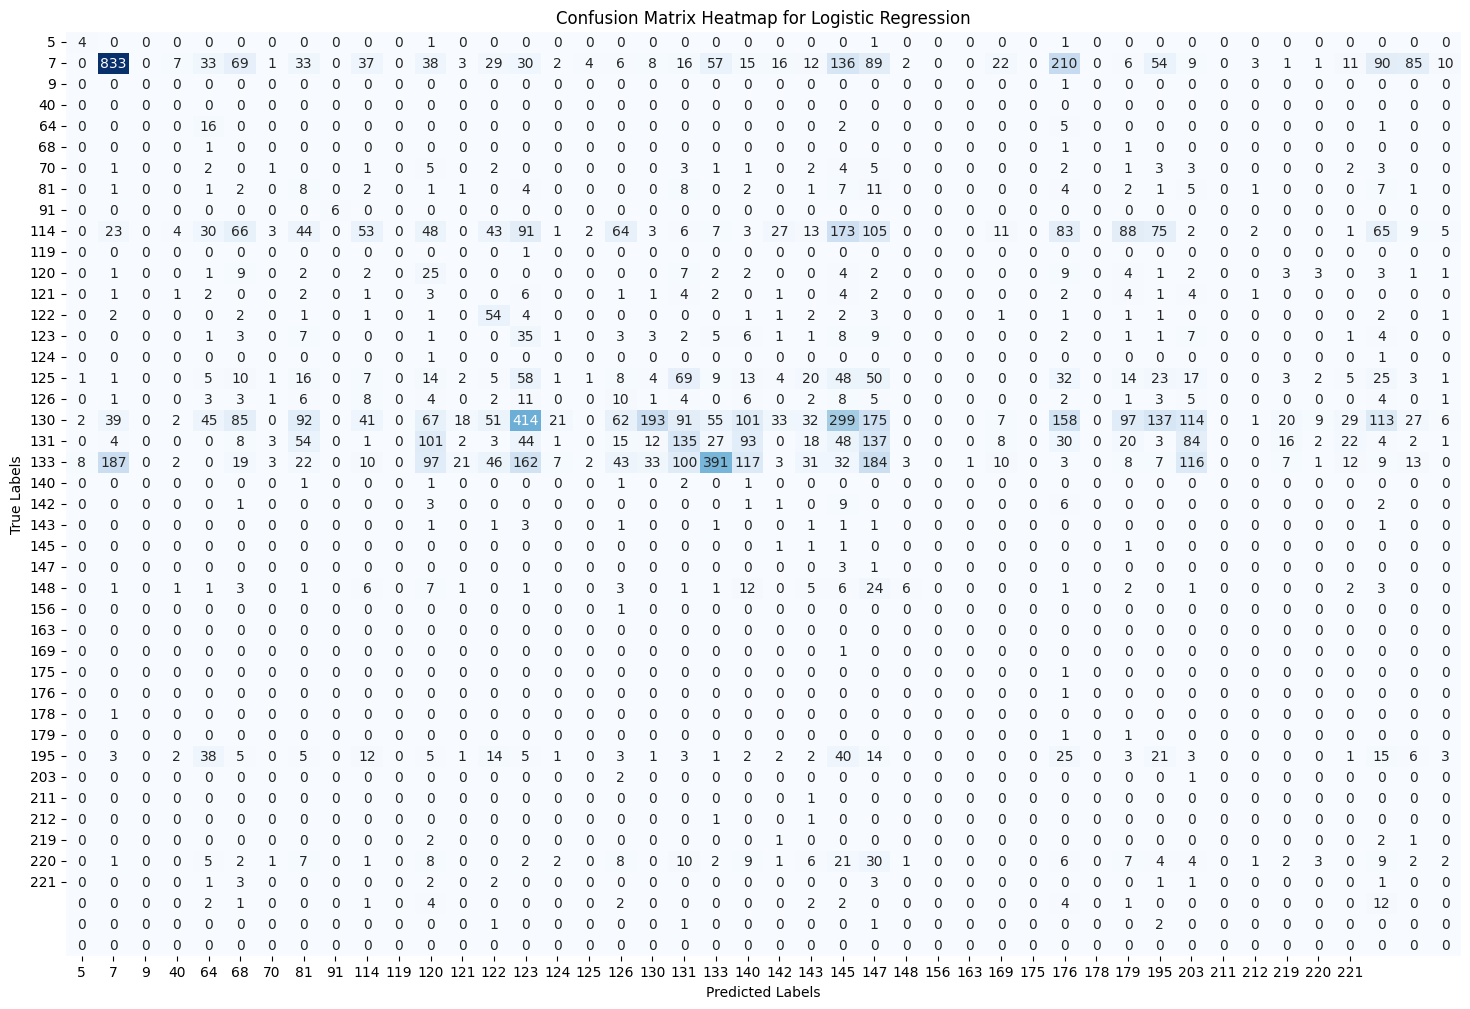

In [288]:
matplotlib.pyplot.figure(figsize=(18, 12))
seaborn.heatmap(confusion_matrix_logistic_regression, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=test_dataset_target_subset.sort_values().unique(), yticklabels=test_dataset_target_subset.sort_values().unique())

#matplotlib.pyplot.xticks(, logistic_regression_model.classes_)

matplotlib.pyplot.xlabel("Predicted Labels")
matplotlib.pyplot.ylabel("True Labels")

matplotlib.pyplot.title("Confusion Matrix Heatmap for Logistic Regression")

matplotlib.pyplot.show()


#### Reference on the L7Protocol integer using a Dictionary

It is possible to reference the actual protocol mapping based on the integer found in the heatmap by using a dictionary "l7_protocol_index_to_name_mapping".

In [ ]:
l7_protocol_index_to_name_mapping

{np.int64(131): 'HTTP_PROXY',
 np.int64(7): 'HTTP',
 np.int64(130): 'HTTP_CONNECT',
 np.int64(91): 'SSL',
 np.int64(126): 'GOOGLE',
 np.int64(124): 'YOUTUBE',
 np.int64(119): 'FACEBOOK',
 np.int64(40): 'CONTENT_FLASH',
 np.int64(121): 'DROPBOX',
 np.int64(147): 'WINDOWS_UPDATE',
 np.int64(178): 'AMAZON',
 np.int64(212): 'MICROSOFT',
 np.int64(163): 'TOR',
 np.int64(122): 'GMAIL',
 np.int64(70): 'YAHOO',
 np.int64(68): 'MSN',
 np.int64(64): 'SSL_NO_CERT',
 np.int64(125): 'SKYPE',
 np.int64(221): 'MS_ONE_DRIVE',
 np.int64(114): 'MSSQL',
 np.int64(120): 'TWITTER',
 np.int64(143): 'APPLE_ICLOUD',
 np.int64(220): 'CLOUDFLARE',
 np.int64(169): 'UBUNTUONE',
 np.int64(219): 'OFFICE_365',
 np.int64(176): 'WIKIPEDIA',
 np.int64(201): 'OPENSIGNAL',
 np.int64(5): 'DNS',
 np.int64(60): 'HTTP_DOWNLOAD',
 np.int64(142): 'WHATSAPP',
 np.int64(145): 'APPLE_ITUNES',
 np.int64(175): 'FTP_DATA',
 np.int64(132): 'CITRIX',
 np.int64(140): 'APPLE',
 np.int64(222): 'MQTT',
 np.int64(211): 'INSTAGRAM',
 np.int

#### Classification Report using Test Dataset

In [289]:
print(classification_report(test_dataset_target_subset, test_dataset_predict_logistic_regression))

              precision    recall  f1-score   support

           5       0.27      0.57      0.36         7
           7       0.76      0.42      0.54      1978
           9       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         0
          40       0.09      0.67      0.15        24
          64       0.00      0.00      0.00         3
          68       0.07      0.02      0.04        42
          70       0.03      0.11      0.04        70
          81       1.00      1.00      1.00         6
          91       0.29      0.05      0.08      1150
         114       0.00      0.00      0.00         1
         119       0.06      0.30      0.10        84
         120       0.00      0.00      0.00        43
         121       0.21      0.67      0.32        81
         122       0.04      0.34      0.07       102
         123       0.00      0.00      0.00         2
         124       0.11      0.00      0.00       472
         125       0.04    

c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## Decision Tree Model Evaluation

#### Confusion Matrix for Decision Tree

In [242]:
confusion_matrix_decision_tree = confusion_matrix(test_dataset_target_subset, test_dataset_predict_decision_tree_classifier)

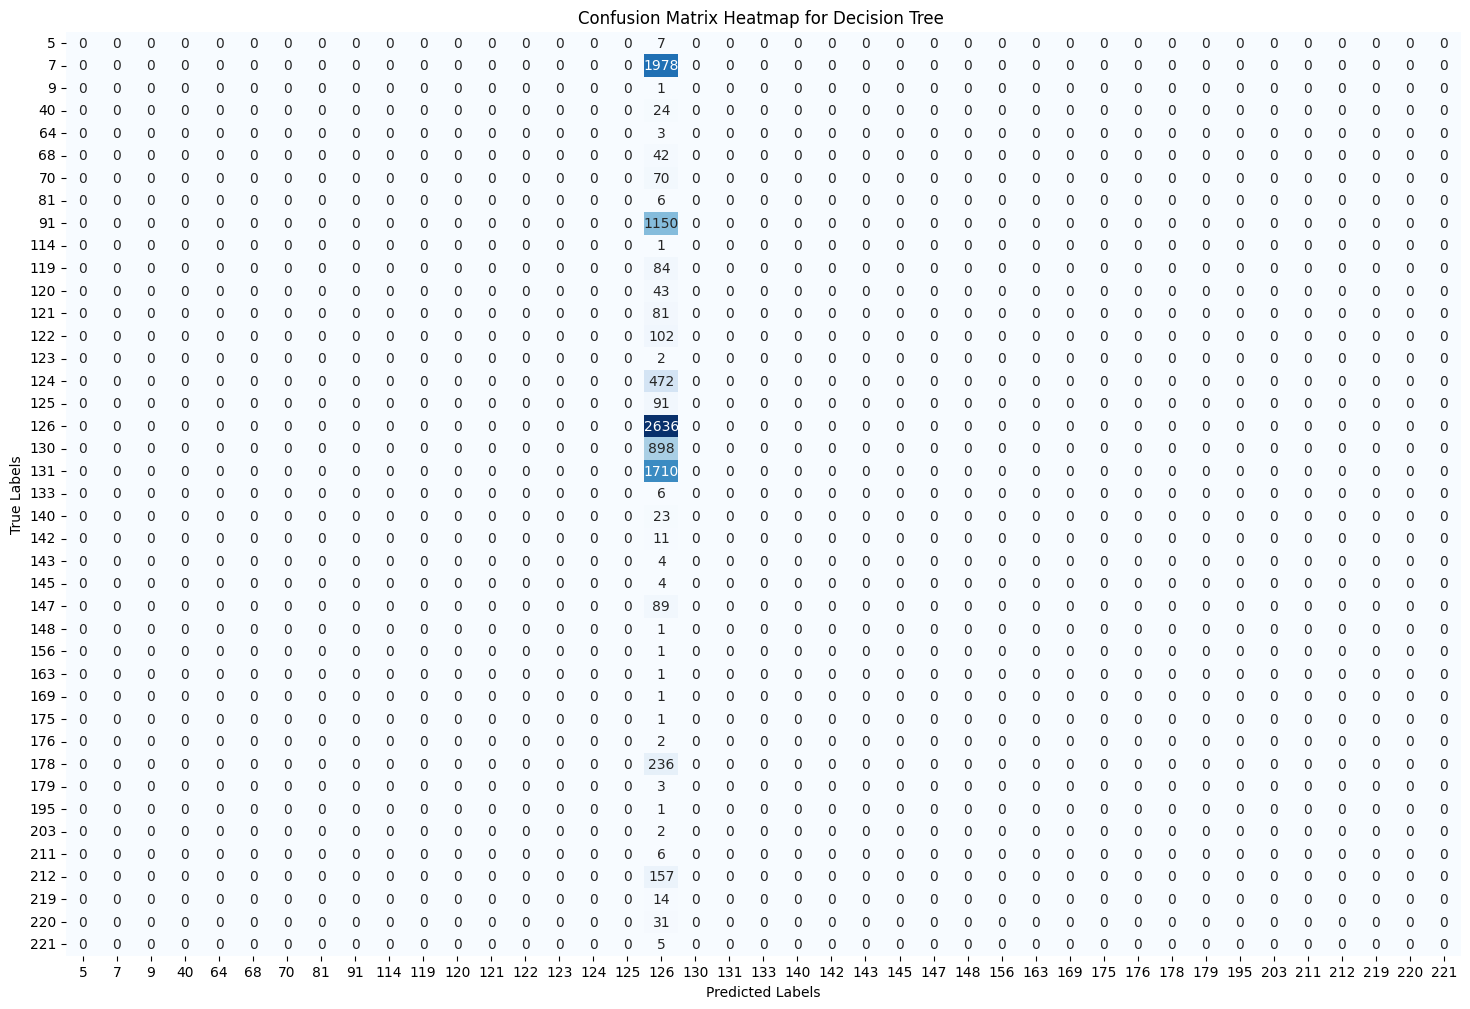

In [250]:
matplotlib.pyplot.figure(figsize=(18, 12))
seaborn.heatmap(confusion_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=test_dataset_target_subset.sort_values().unique(), yticklabels=test_dataset_target_subset.sort_values().unique())


matplotlib.pyplot.xlabel("Predicted Labels")
matplotlib.pyplot.ylabel("True Labels")

matplotlib.pyplot.title("Confusion Matrix Heatmap for Decision Tree ")

matplotlib.pyplot.show()


#### Classification Report using Test Dataset

In [229]:
print(classification_report(test_dataset_target_subset, test_dataset_predict_decision_tree_classifier))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00      1978
           9       0.00      0.00      0.00         1
          40       0.00      0.00      0.00        24
          64       0.00      0.00      0.00         3
          68       0.00      0.00      0.00        42
          70       0.00      0.00      0.00        70
          81       0.00      0.00      0.00         6
          91       0.00      0.00      0.00      1150
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        84
         120       0.00      0.00      0.00        43
         121       0.00      0.00      0.00        81
         122       0.00      0.00      0.00       102
         123       0.00      0.00      0.00         2
         124       0.00      0.00      0.00       472
         125       0.00      0.00      0.00        91
         126       0.26    

c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\angko\Desktop\Network-Analysis-Project\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Model comparison and selecting the best model

* Compare the models and justify your choice of the best-performing model.

The best model in this test using the metric of f1-score and accuracy while taking into the account based on the graph shown in the Confusion Matrix is Support Vector Machine Classifier (SVC). 

This is because the SVC model is able to predict correctly on different classes (target variable) using the 10000 subset of data. 

Even though the data shown in the classification report is not ideal but the performance can be improve if there are more data and more fine tuning done in the model.

The other model which came close to SVC is Logistic Regression model. 

Other models like Decision Tree model and Random Forest Classifier have good performance data in the Classification report but in the Confusion matrix, the prediction data are mainly focused on 1 class and fail to predict other classes in the target variable.



